# 1. Exploratory Data Analysis

## Import packages

In [53]:
import pandas as pd
import numpy as np

# for data visualization 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

---

# 2. Loading data with Pandas

We need to load `client_df.csv` and price_df_df.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook.

All variables related to `Data Description.docs`

In [54]:
# read dataset client_df
client_df = pd.read_csv('./client_data.csv')
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [55]:
# read dataset price_data
price_df = pd.read_csv('./price_data.csv')
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

# 3. Descriptive Statistics of Data

### Data types

In [56]:
print("Rows and Columns of Client Data is: ", client_df.shape)
print("Rows and Columns of Price Data is: ", price_df.shape)

Rows and Columns of Client Data is:  (14606, 26)
Rows and Columns of Price Data is:  (193002, 8)


In [57]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [58]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Checking Missing Values

In [59]:
print(client_df.isnull().any())

id                                False
channel_sales                     False
cons_12m                          False
cons_gas_12m                      False
cons_last_month                   False
date_activ                        False
date_end                          False
date_modif_prod                   False
date_renewal                      False
forecast_cons_12m                 False
forecast_cons_year                False
forecast_discount_energy          False
forecast_meter_rent_12m           False
forecast_price_energy_off_peak    False
forecast_price_energy_peak        False
forecast_price_pow_off_peak       False
has_gas                           False
imp_cons                          False
margin_gross_pow_ele              False
margin_net_pow_ele                False
nb_prod_act                       False
net_margin                        False
num_years_antig                   False
origin_up                         False
pow_max                           False


In [60]:
print(price_df.isnull().any())

id                    False
price_date            False
price_off_peak_var    False
price_peak_var        False
price_mid_peak_var    False
price_off_peak_fix    False
price_peak_fix        False
price_mid_peak_fix    False
dtype: bool


Based on the information given, it appears that both `client_data` and `price_data` datasets have no missing or null values. The fact that the `isnull()` function returns `FALSE` for all rows and columns in both datasets implies that there are no missing or null values present in the data.

### Statistics

Let's look at some statistics about the datasets

In [61]:
# Statistical Summary of client_df
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


• The summary statistics provided for each variable provide information about the central tendency, dispersion, and range of the data. For example, the mean values for `cons_12m` and `net_margin` are `159220.286` and `189.264522` respectively, indicating a relatively large scale of energy consumption and a moderate level of profit margin for the company. On the other hand, the mean value for `churn` is `0.097152`, indicating that about `9.7%` of customers churned or left the company.

• The standard deviation (std) values for most variables are relatively large, indicating that the data is widely spread and that there are some extreme values or outliers. For example, the std value for `cons_12m` is `573465.264`, which is much higher than the mean value.

• It's important to note that without further context or domain knowledge, it's difficult to make definitive conclusions about the dataset.

In [62]:
# Statistical Summary of price_df
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


The mean and standard deviation (std) values for each column suggest that there is some variability in pricing, particularly for the variable pricing components. The minimum and maximum values indicate the range of possible pricing for each component. Overall, this dataset appears to be useful for analyzing pricing trends for different electricity usage rates.

---

# 4. Data Visualization

In [63]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()


def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')


# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_label_bar_chart(df, target_variable, if_sort=False, gap_label_bar=0, rotation = 0, figsize=(18,10)):
    # prepare data
    plot_data = client_df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)
    # rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
    # set axis labels
    ax.set_xlabel(target_variable)
    ax.set_ylabel('Percent')
    ax.set_title('Distribution of ' + target_variable)
    plt.show()


# define a function to plot stacked bar chart with percent label by churn
def plot_label_with_churn_stacked(df, target_variable, if_sort=False, figsize=(18,10)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)
# set title
    ax.set_title('Stacked Bar Chart of {} by Churn'.format(target_variable))


# define a function to plot histograms the distribution of continous numeric feature
def plot_histogram_by_churn(df, target_variable, figsize=(18,10), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)
# set title
    ax.set_title('Stacked Bar Chart of {} by Churn'.format(target_variable))

### Churn

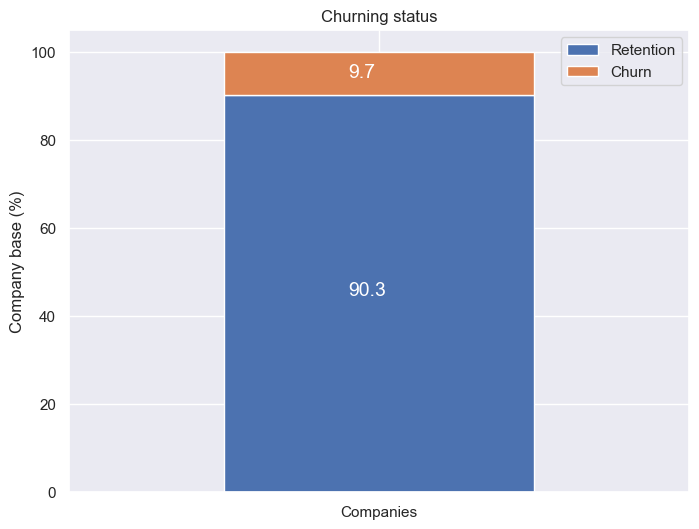


 ----- Value Counts -----

churn
0    13187
1     1419
Name: count, dtype: int64


In [64]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (8, 6), legend_= 1) # type: ignore
print("\n ----- Value Counts -----\n")
print(client_df['churn'].value_counts())

* Nearly 10% (9.7%) of the customers have churned and 90% of the customers have not churned.

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

### Channel Sale


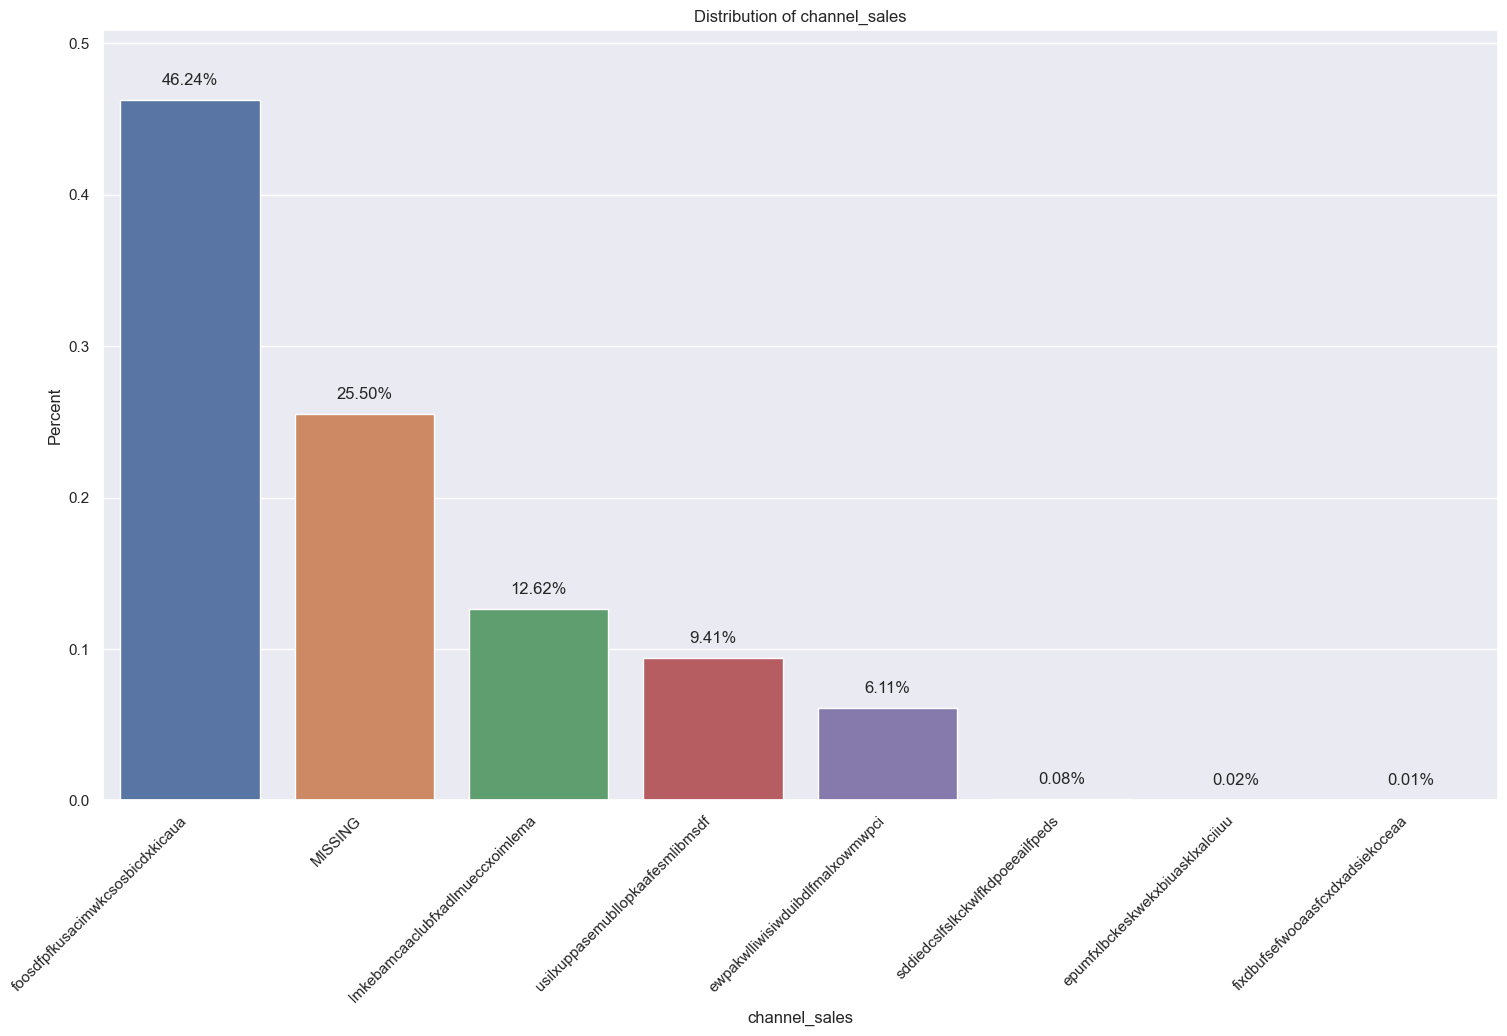

In [65]:
plot_label_bar_chart(df=client_df, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01, rotation = 45)

* The most frequently occurring sales channel is `first column`, whereas `the last 3 column` are very infrequent. Suprisingly, `MISSING` column is on the second highest.

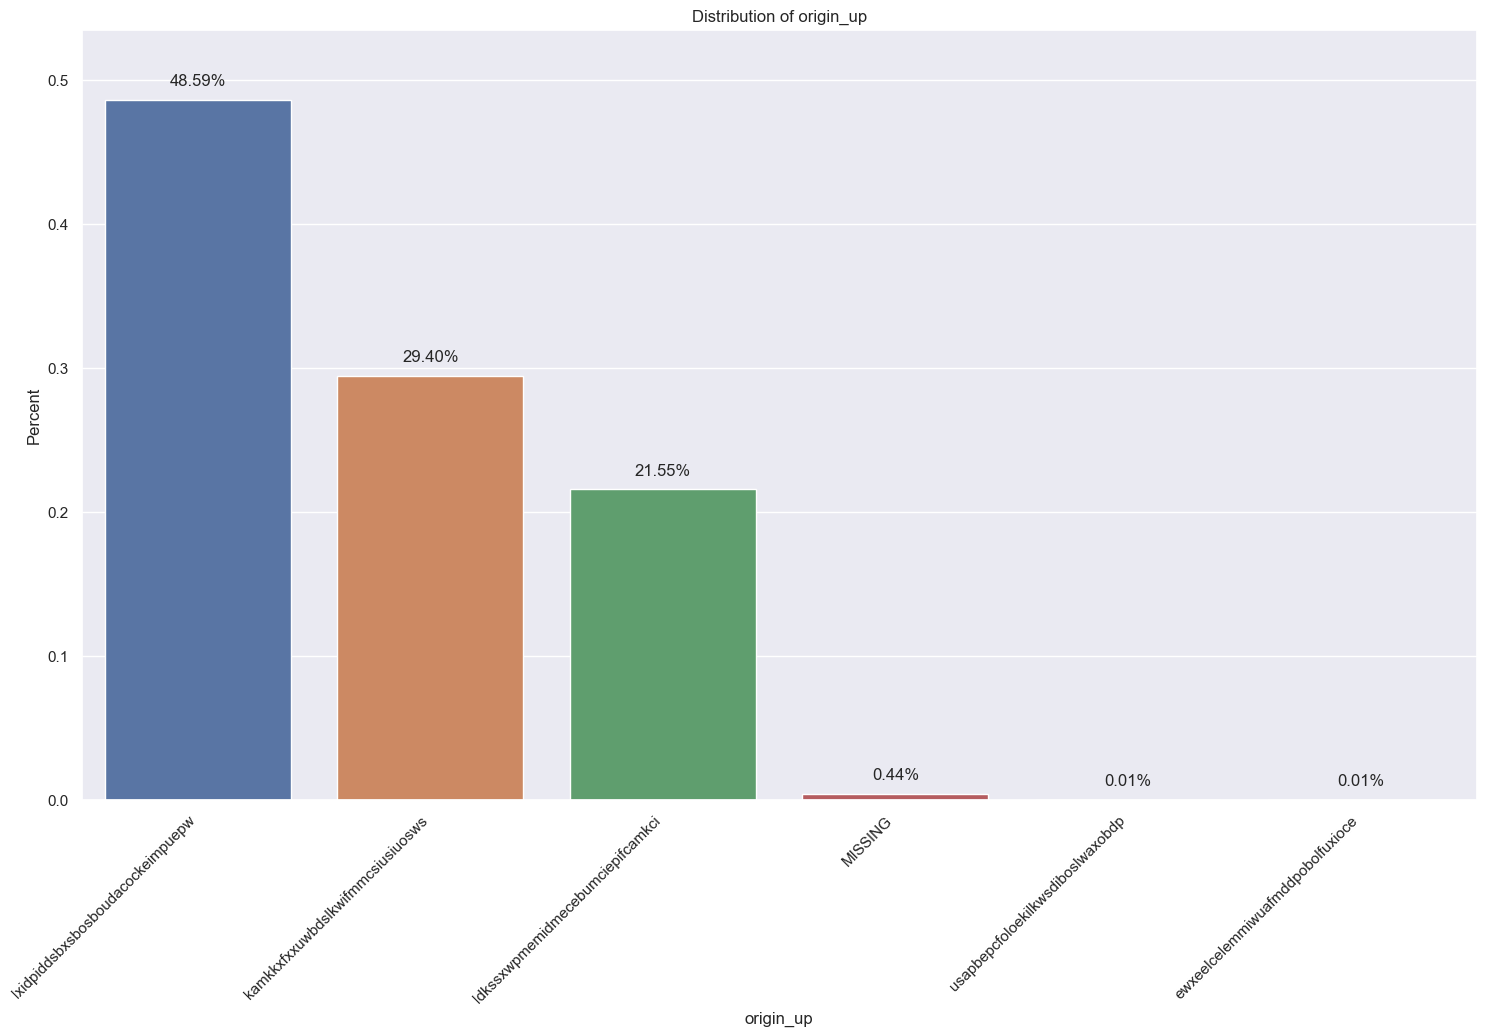

In [66]:
plot_label_bar_chart(df=client_df, target_variable='origin_up', if_sort=True, gap_label_bar=0.01, rotation=45)

* The majority of customers subscribed to `first column` which is `48.59%` as their first electricity campaign, while only a small number of customers subscribed to `the last 3 columns` which is `0.44%, 0.01%, and 0.01%` respectively, campaigns initially.

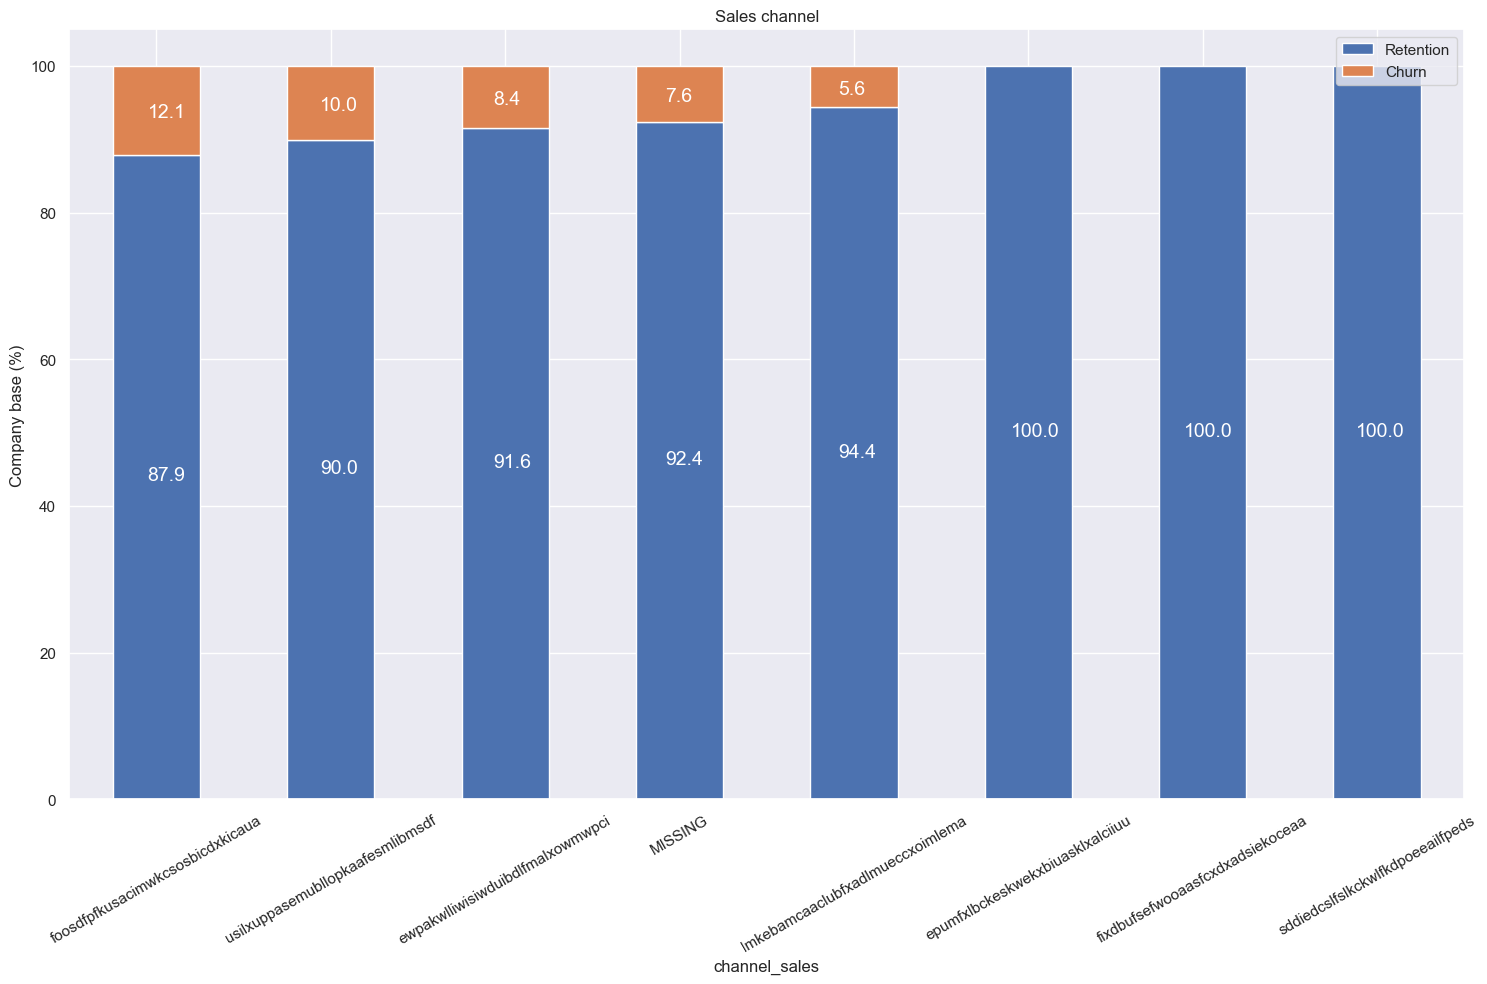

In [67]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

* The proportion of customers who stopped using the service (churned) varies among different sales channels, ranging from `5.6% to 12.1%`, with rare channels excluded.

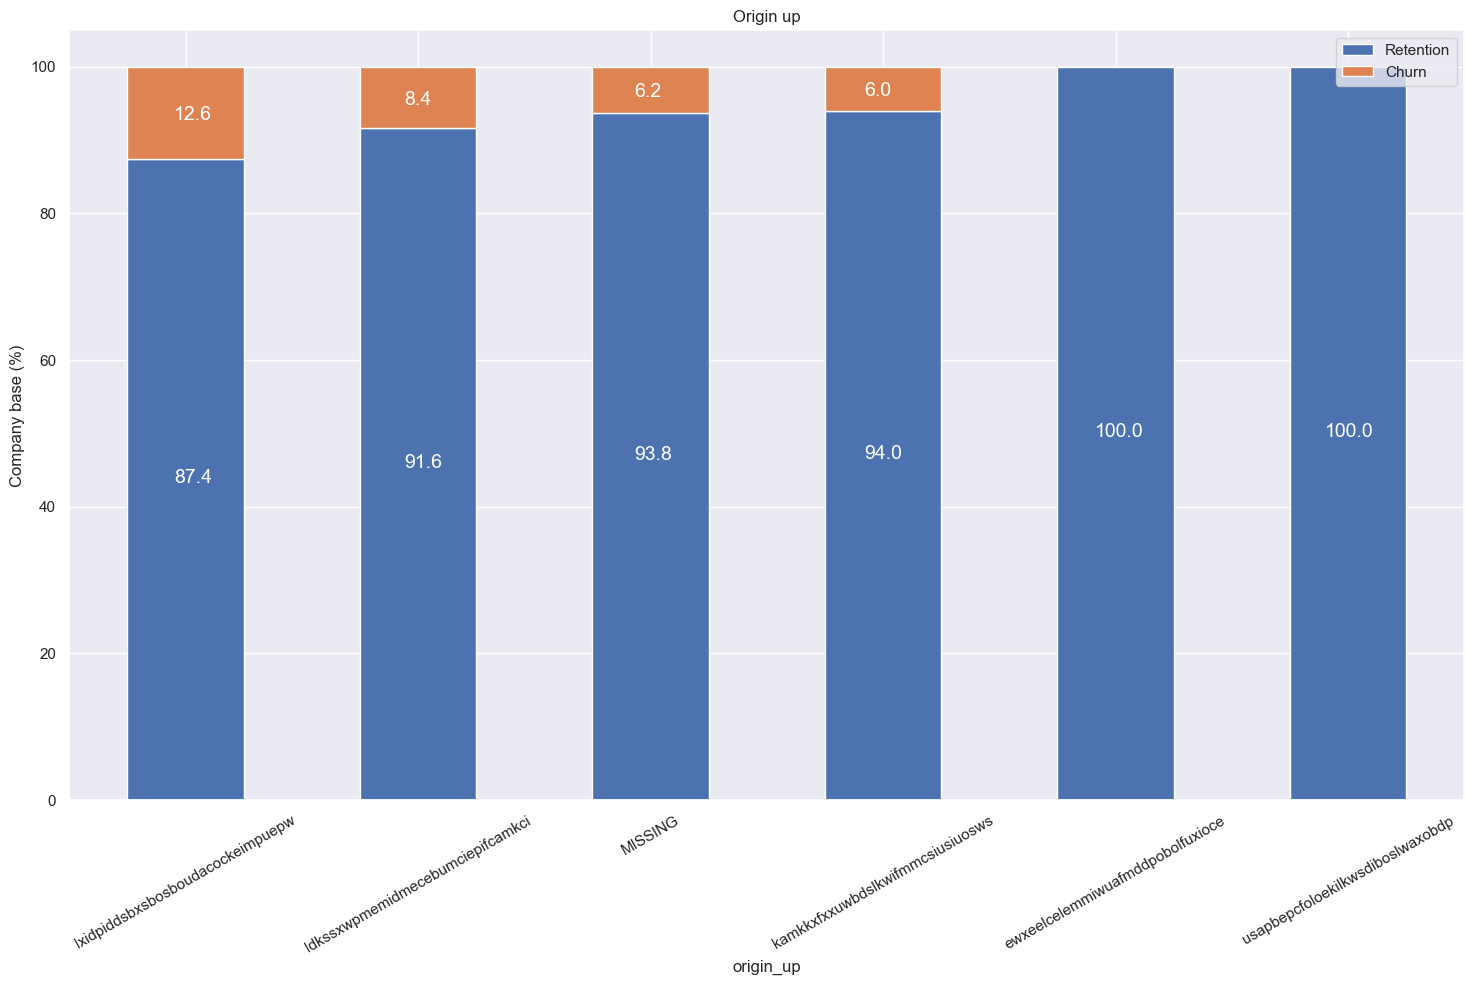

In [68]:
channel = client_df[['id', 'origin_up', 'churn']]
channel = channel.groupby([channel['origin_up'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn, 'Origin up', rot_=30)

* The churning percentage of customers varies between `6.0% to 12.6%` for different types of electricity campaigns except for `the last 2 columns`.

### Contract Length

In [69]:
# convert datetime feature to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[f] = pd.to_datetime(client_df[f])

client_df['contract_start_year'] = client_df['date_activ'].dt.year
client_df['contract_end_year'] = client_df['date_end'].dt.year

In [70]:
plot_label_bar_chart(df=client_df, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.001, figsize=(18,10))

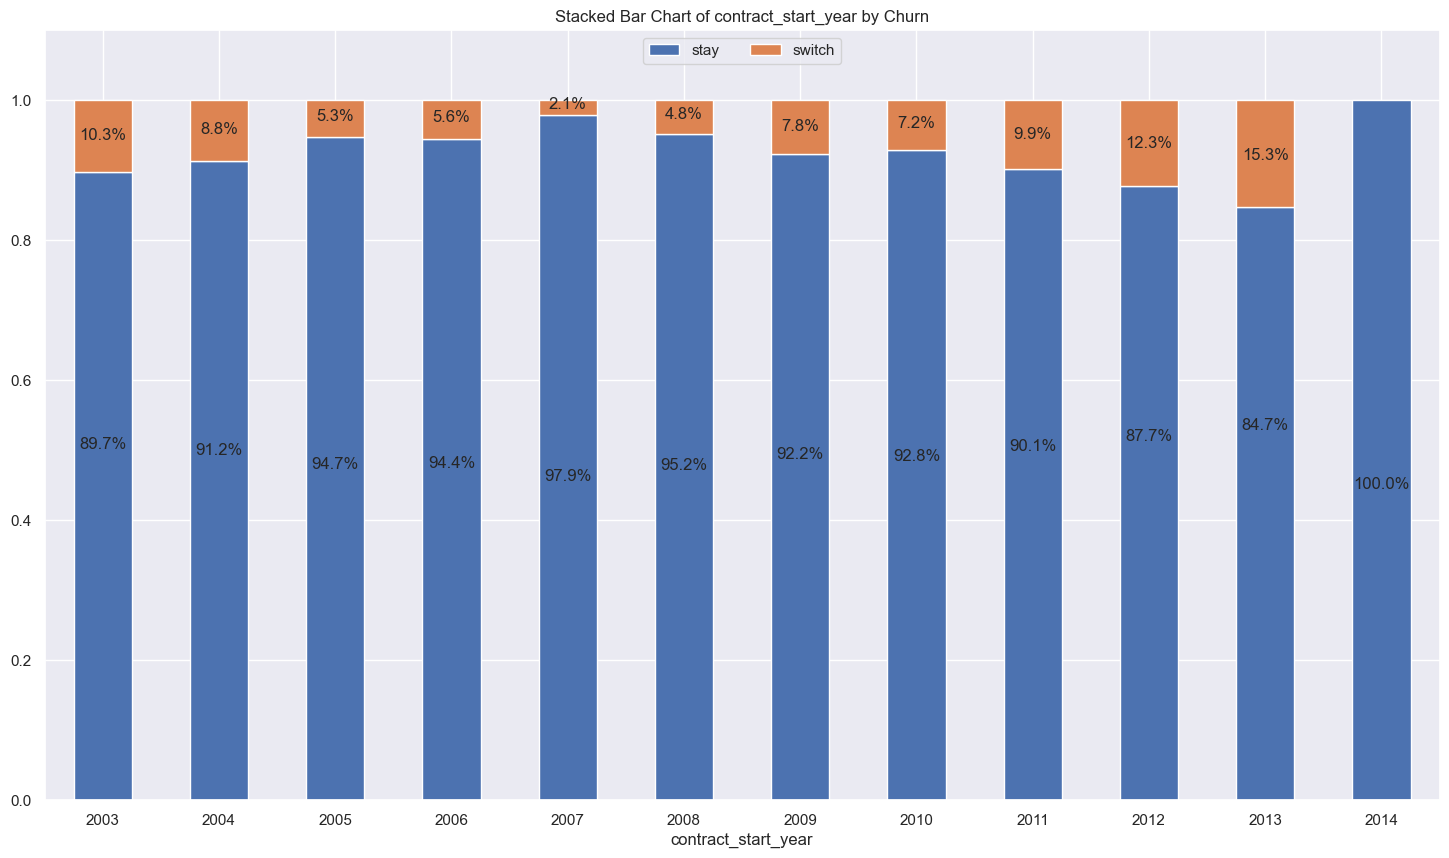

In [ ]:
plot_label_with_churn_stacked(df=client_df, target_variable='contract_start_year', if_sort=False)

* Most cutomers started their contracts from 2009 to 2013. Among these cutomers, it seems newer customers are more likely to switch to other providers.

### Contract Types

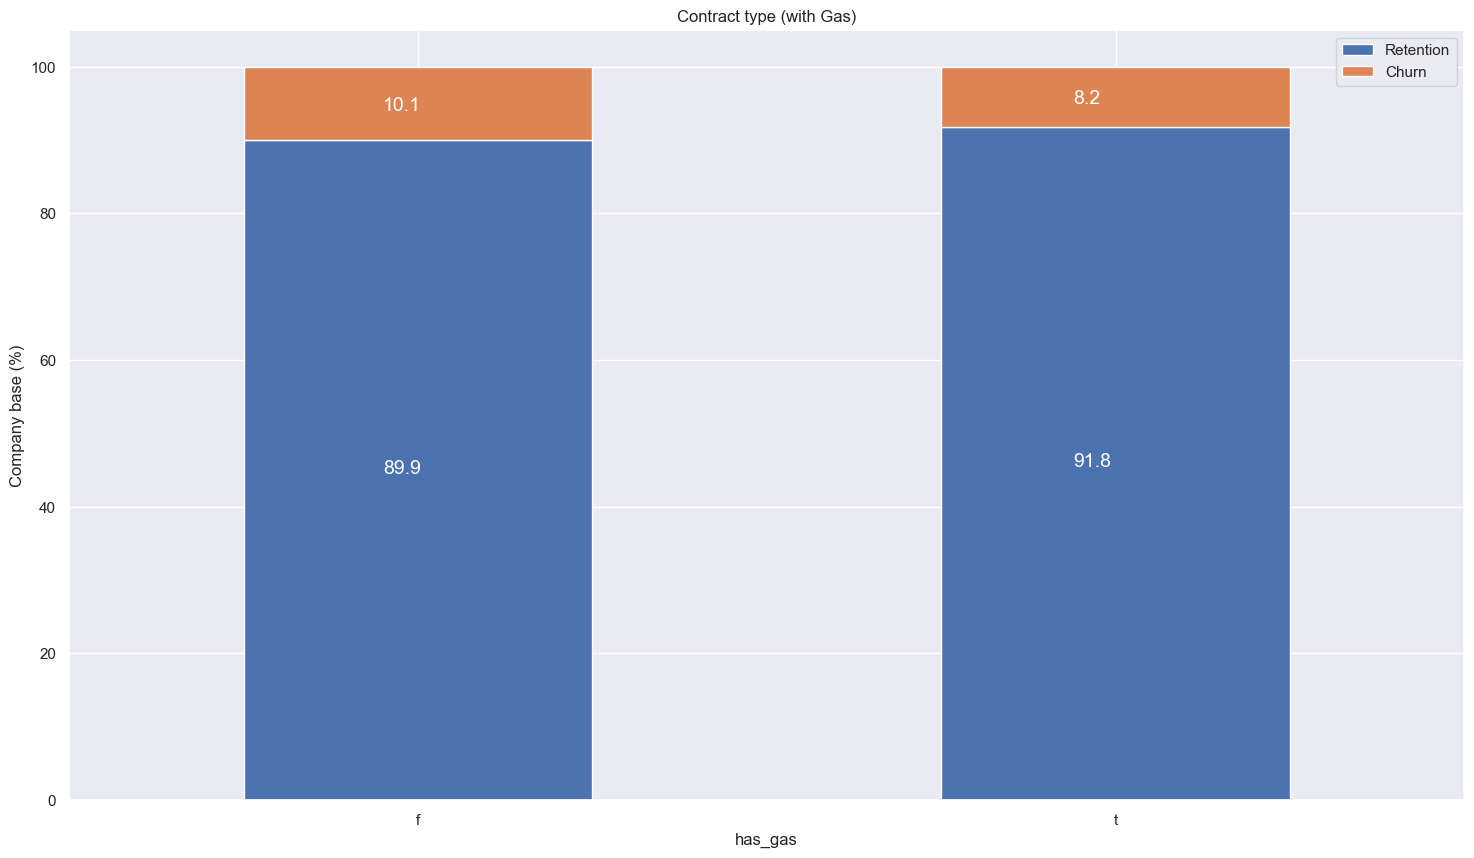

In [ ]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(contract_percentage, 'Contract type (with Gas)')

* Electricity clients are more likely to churn than electricity and gas clients.

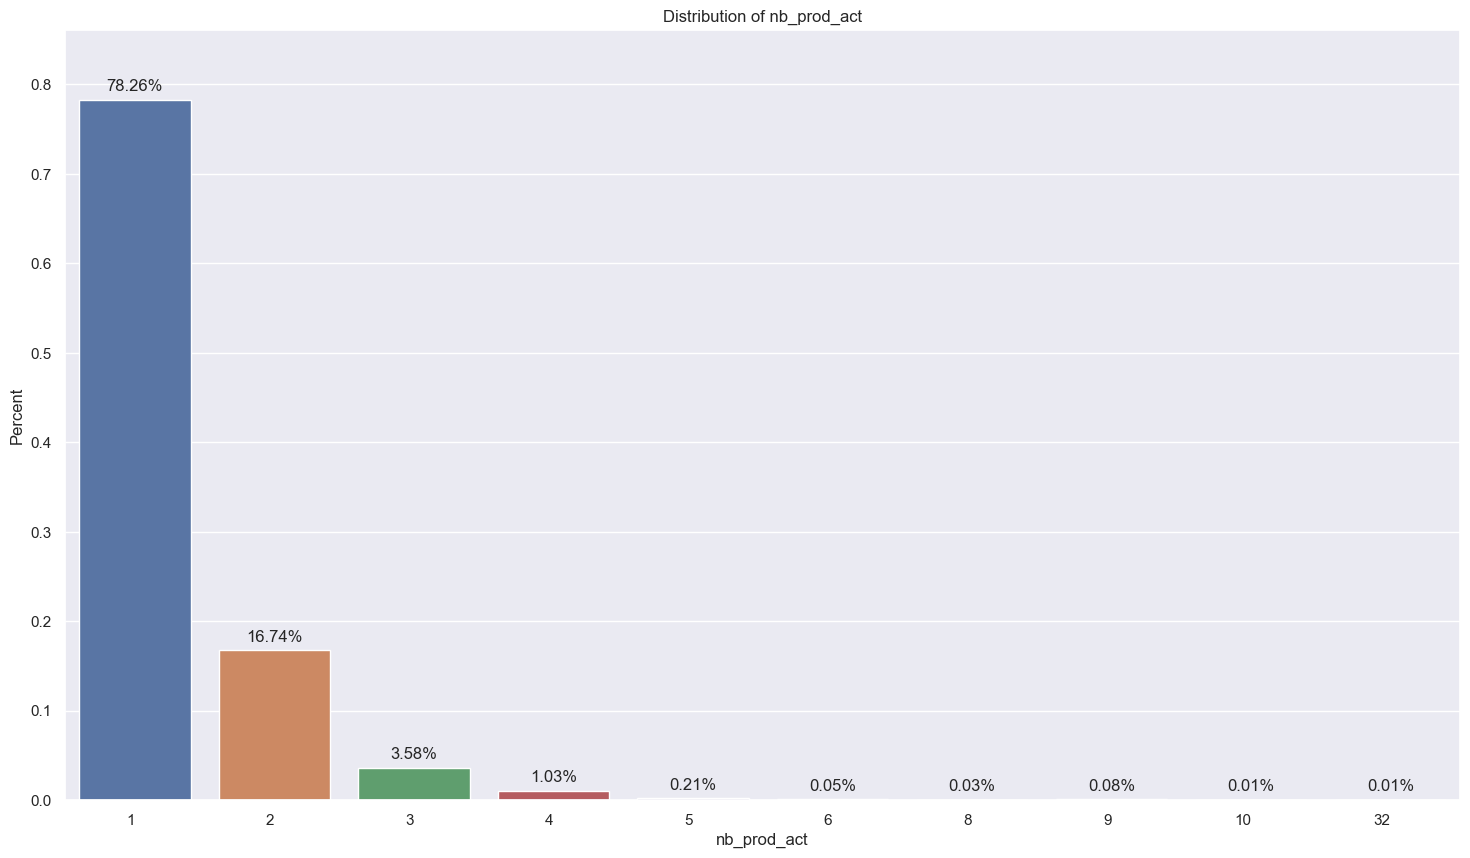

In [ ]:
plot_label_bar_chart(df=client_df, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01)

* The majority of clients had either one or two active products and services.

### Consumption

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
# display the first 5 rows of the `consumption` DataFrame
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [ ]:
# Plot variable distribution in a stacked histogram of churned or retained company
def plot_distribution(dataframe, column, ax, bins_ = 50, title = ''):
    # Create a temporary dataframe with the data to be plotted, separated by churned or retained company
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"] == 0][column], 
                         "Churn":dataframe[dataframe["churn"] == 1][column]})
    
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins = bins_, ax = ax, stacked = True)
    
    # Tile of plot
    ax.set_title(title)

    # X-axis label
    ax.set_xlabel(column)
    
    # Change the x-axis to plain style
    ax.ticklabel_format(style = 'plain', axis = 'x')

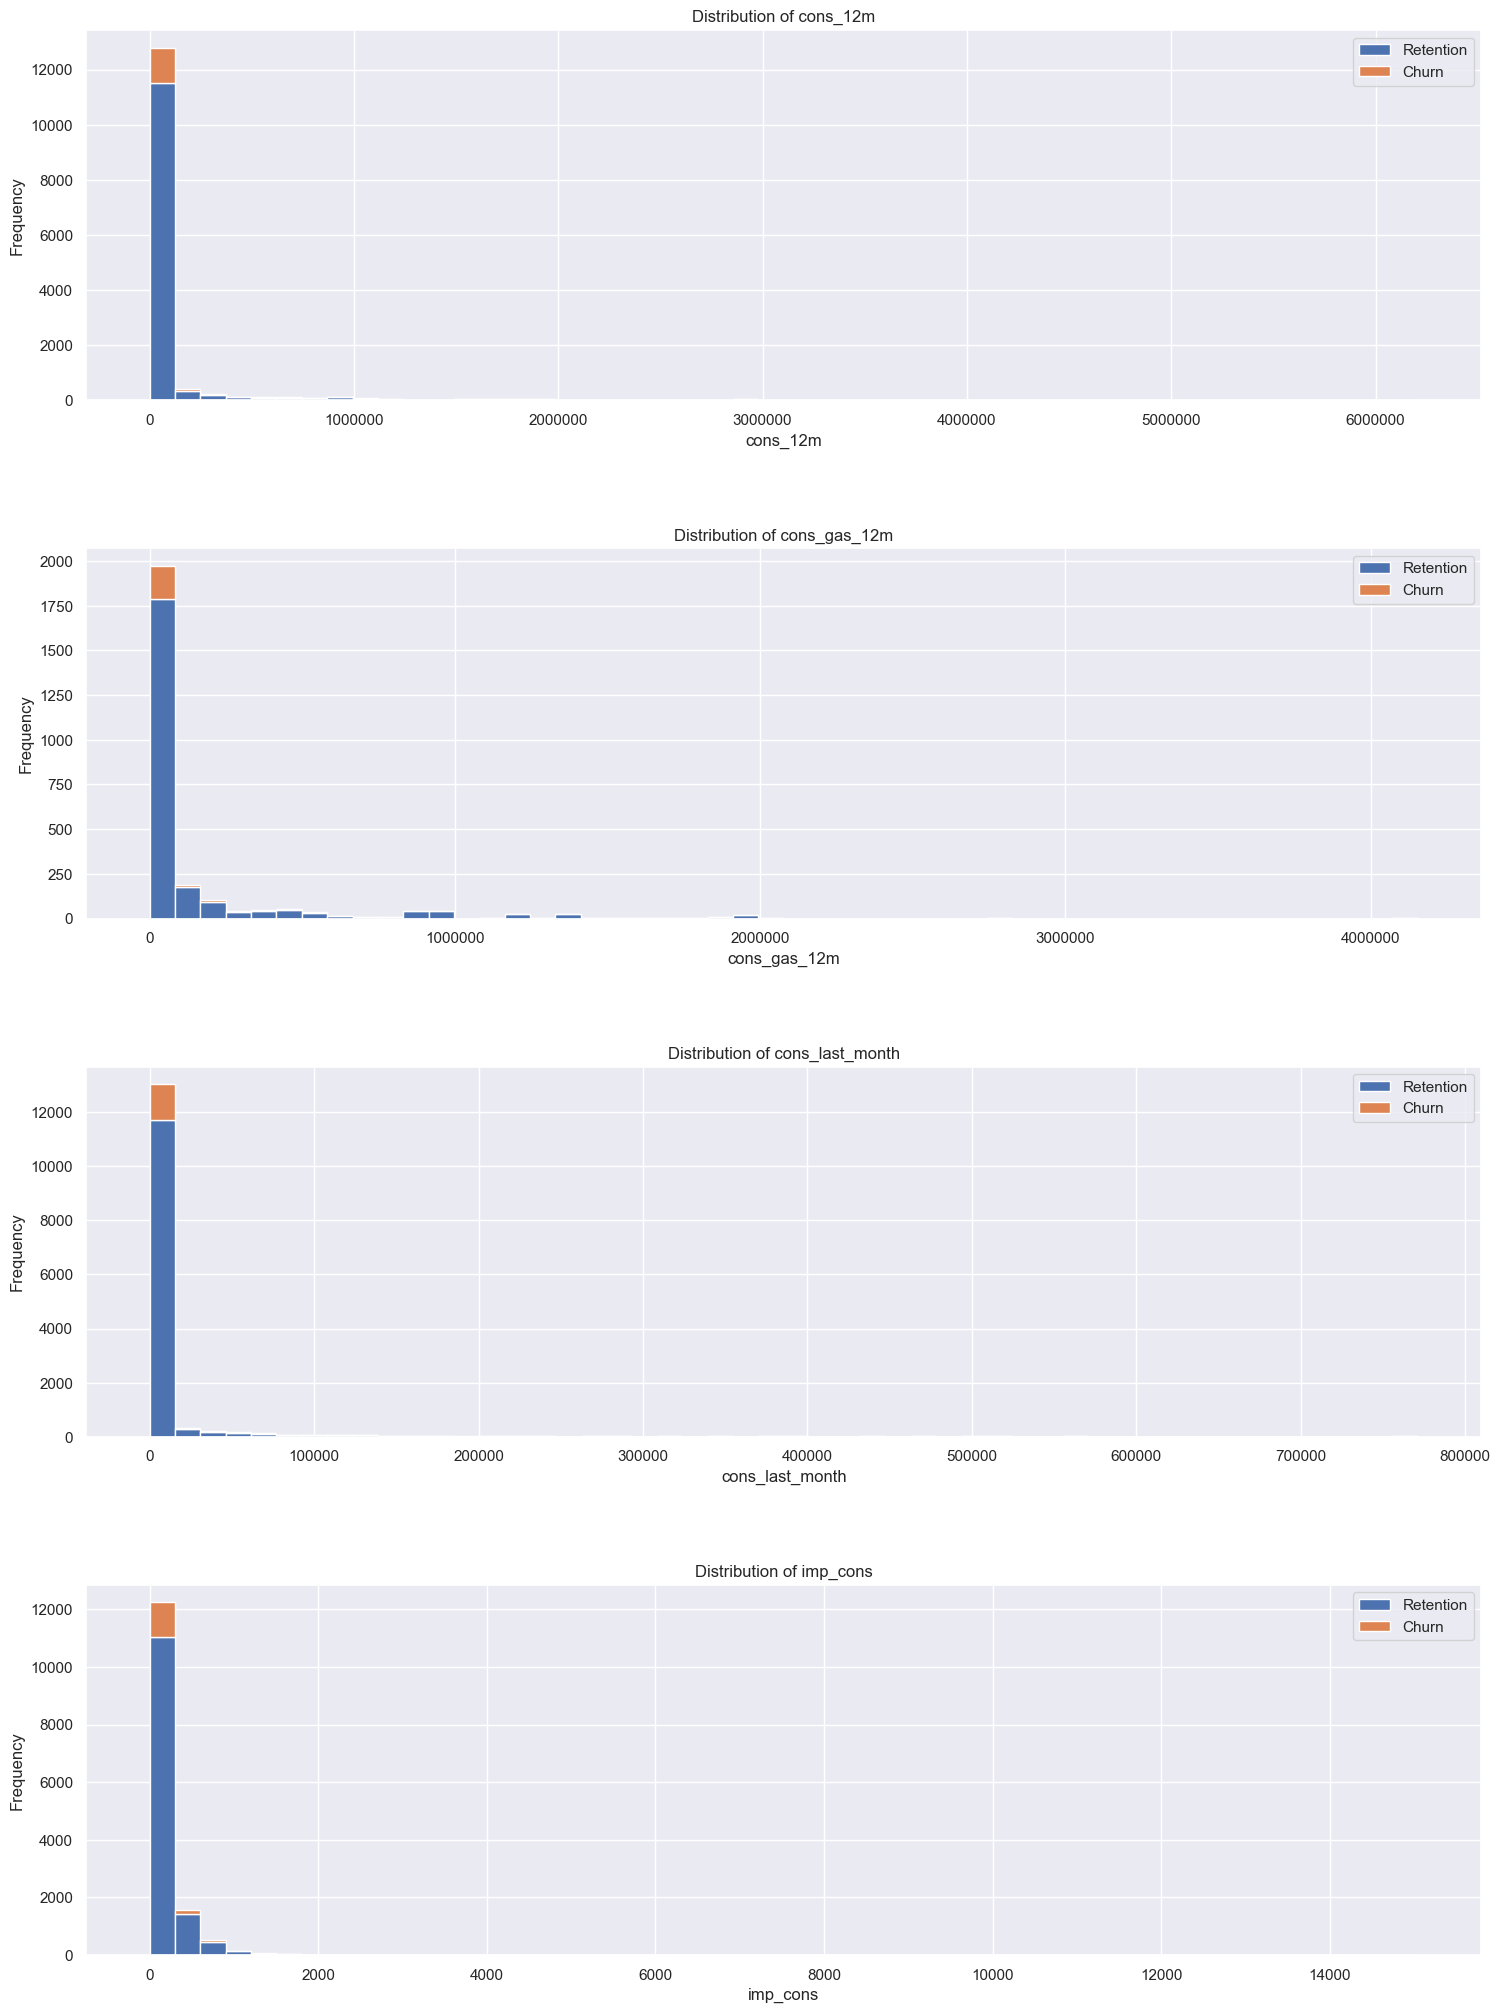

In [ ]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(nrows = 4, figsize = (18, 25))

fig.subplots_adjust(hspace=0.4)

# Plot the distribution of 'cons_12m' in the first subplot
plot_distribution(consumption, 'cons_12m',axs[0], title = 'Distribution of cons_12m')

# Plot the distribution of 'cons_gas_12m' in the second subplot, only for customers with gas
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1], title = 'Distribution of cons_gas_12m')

# Plot the distribution of 'cons_last_month' in the third subplot
plot_distribution(consumption, 'cons_last_month', axs[2], title = 'Distribution of cons_last_month')

# Plot the distribution of 'imp_cons' in the fourth subplot
plot_distribution(consumption, 'imp_cons', axs[3], title = 'Distribution of imp_cons')

* We can say that the consumption data is positively skewed with a long right tail, indicating the presence of outliers at the upper end of the distribution. The use of a histogram plot can help uncover anomalies and their values, as well as reveal the degree of symmetry and skewness in the data.

* However, to further investigate the outliers and skewness of data, we shall use boxplot to sketch that. On the other hand, violin plots are similar to boxplots, but they also display the density of the data at various values. They can provide a better understanding of the shape of the distribution, including the presence of multiple peaks or gaps.

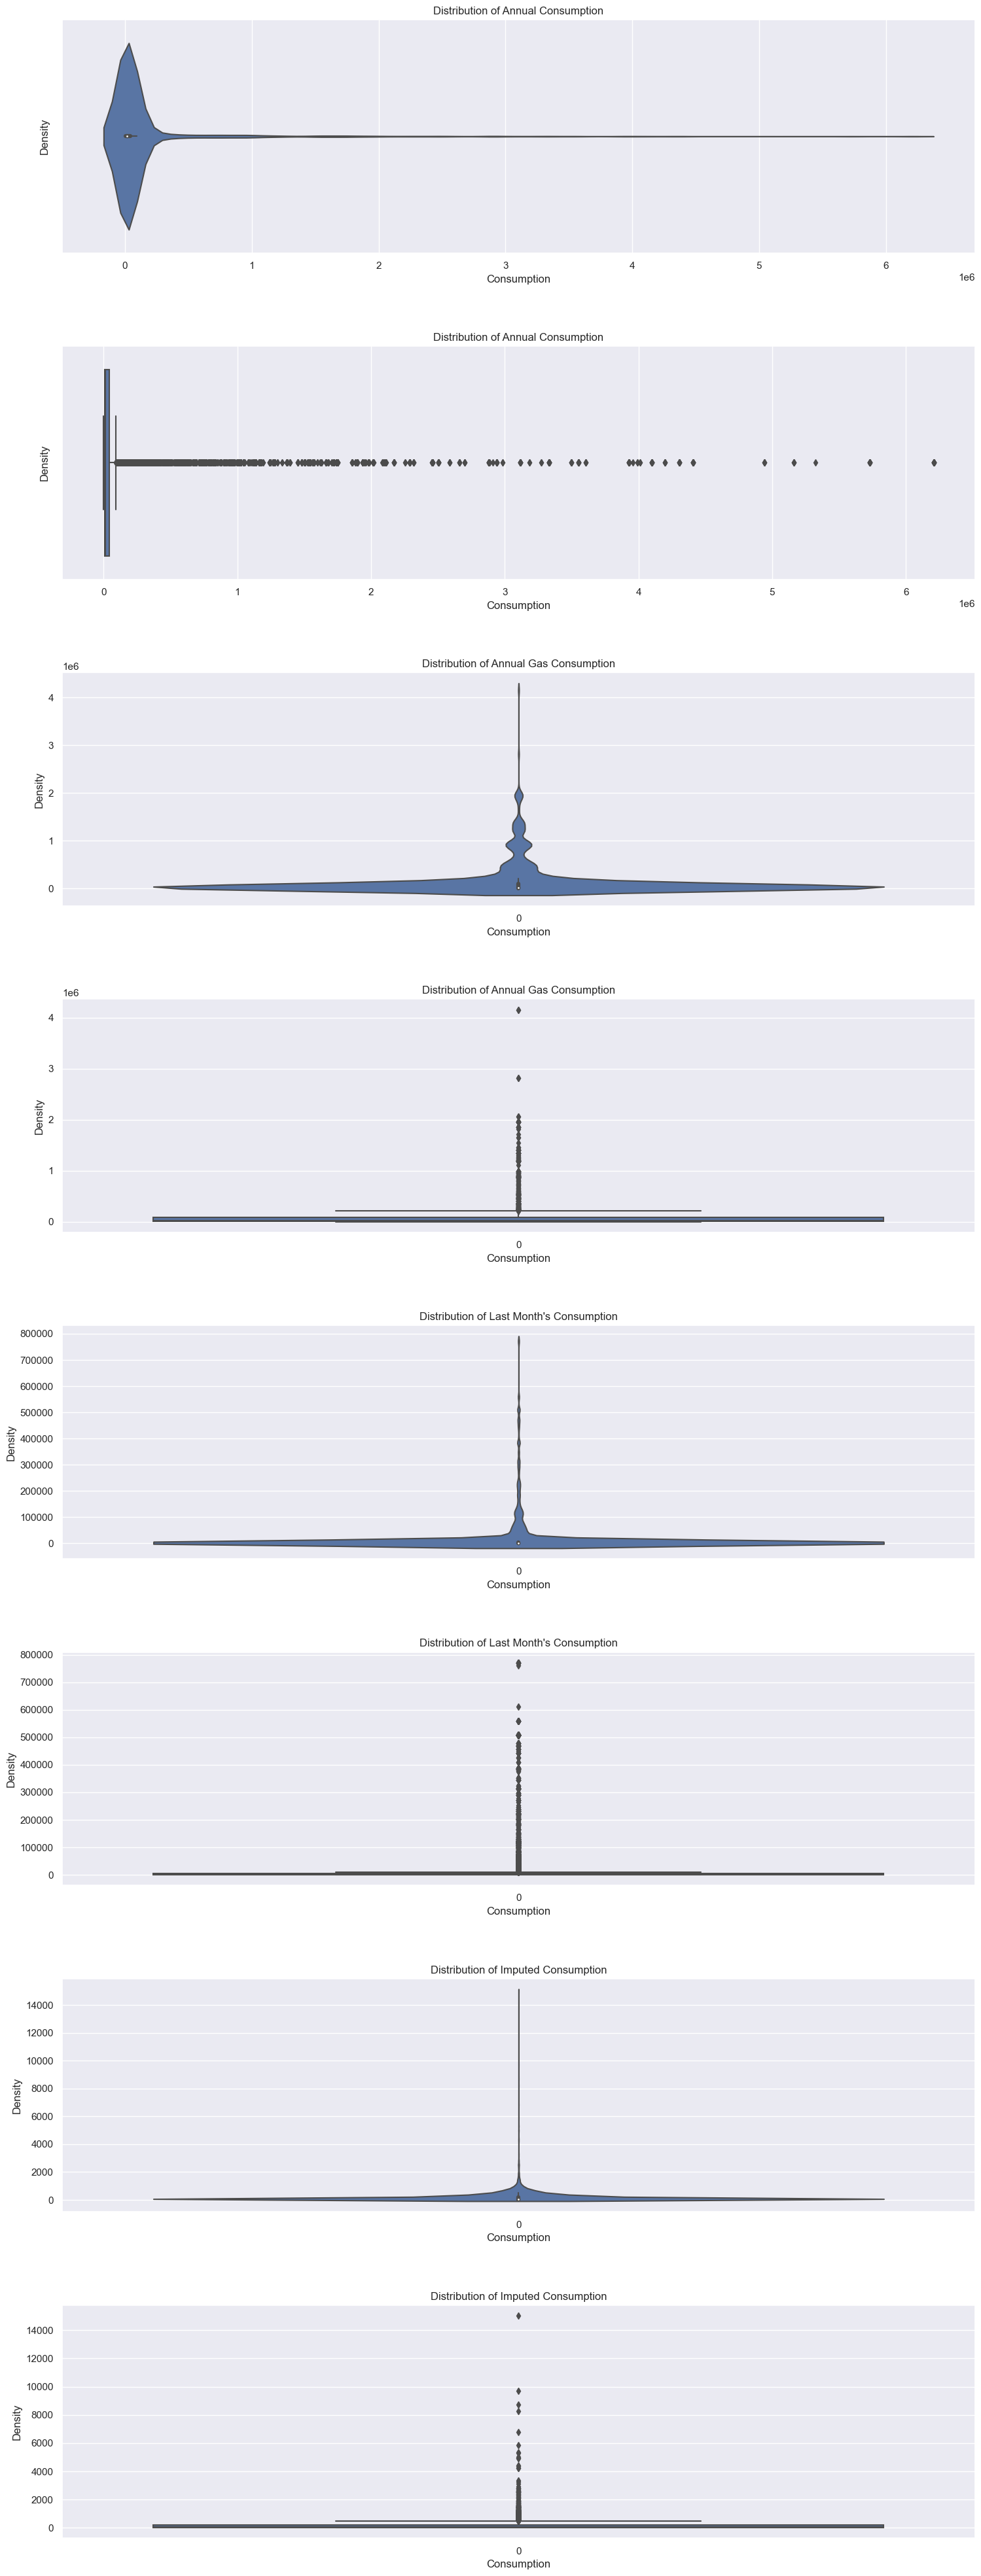

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=8, figsize=(18, 50))

fig.subplots_adjust(hspace=0.4)

# Add violinplot & boxplot to the first subplot
sns.violinplot(data=consumption, x="cons_12m", ax=axs[0])
axs[0].set_title("Distribution of Annual Consumption")

sns.boxplot(data=consumption, x="cons_12m", ax=axs[1])
axs[1].set_title("Distribution of Annual Consumption")

# Add violinplot & boxplot to the second subplot
sns.violinplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[2])
axs[2].set_title("Distribution of Annual Gas Consumption")

sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[3])
axs[3].set_title("Distribution of Annual Gas Consumption")

# Add violinplot & boxplot to the third subplot
sns.violinplot(consumption["cons_last_month"], ax=axs[4])
axs[4].set_title("Distribution of Last Month's Consumption")

sns.boxplot(consumption["cons_last_month"], ax=axs[5])
axs[5].set_title("Distribution of Last Month's Consumption")

# Add violinplot & boxplot to the forth subplot
sns.violinplot(consumption["imp_cons"], ax=axs[6])
axs[6].set_title("Distribution of Imputed Consumption")

sns.boxplot(consumption["imp_cons"], ax=axs[7])
axs[7].set_title("Distribution of Imputed Consumption")

# Remove scientific notation from the x-axis
for ax in axs:
    ax.set_xlabel('Consumption')
    ax.set_ylabel('Density')
    if isinstance(ax.get_xticklabels()[0].get_text(), str):
        continue
    ax.ticklabel_format(style='plain', axis='x')

plt.show()


* The violin plots show the distribution of data, with the width of the plot indicating the density of data points at a given value. The boxplots show the distribution of the data in terms of the quartiles and outliers. Together, these plots provide a more complete picture of the distribution of the data.

* Overall, the code provides a useful visualization of the distribution of consumption variables, and it can be used to identify potential outliers and skewness in the data.

### Price

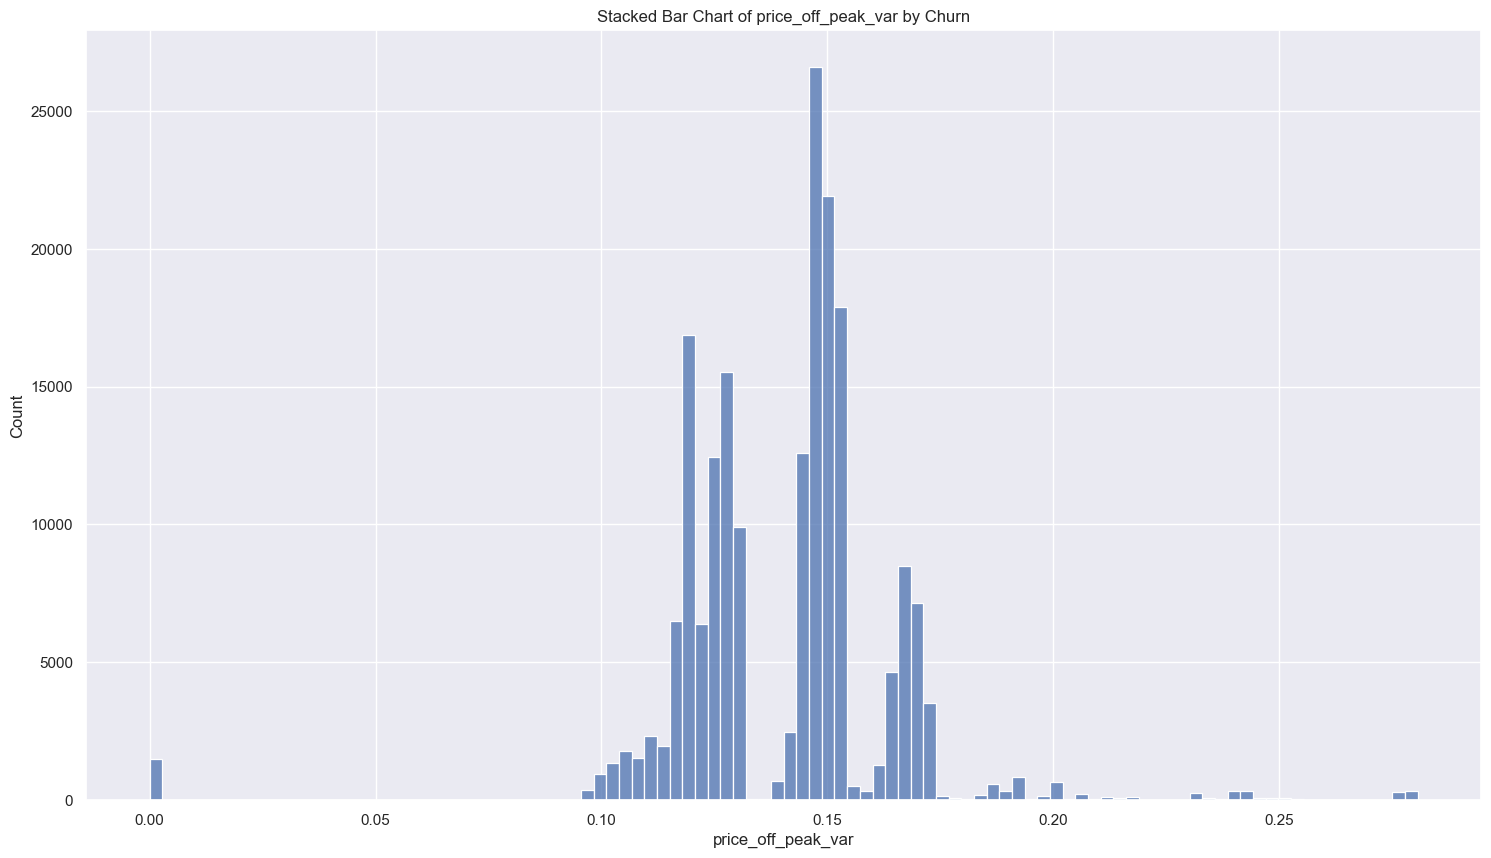

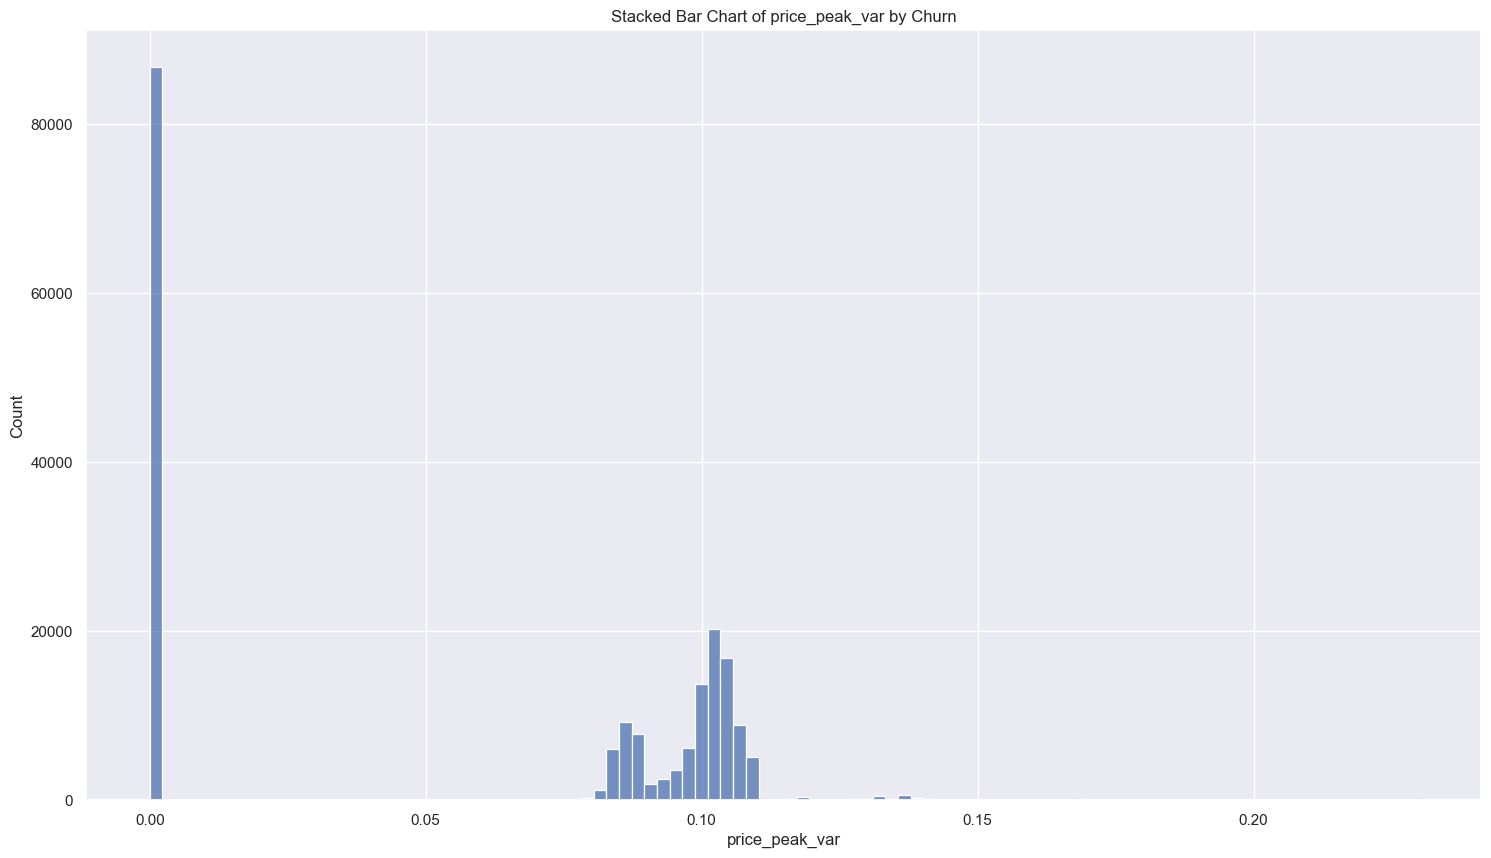

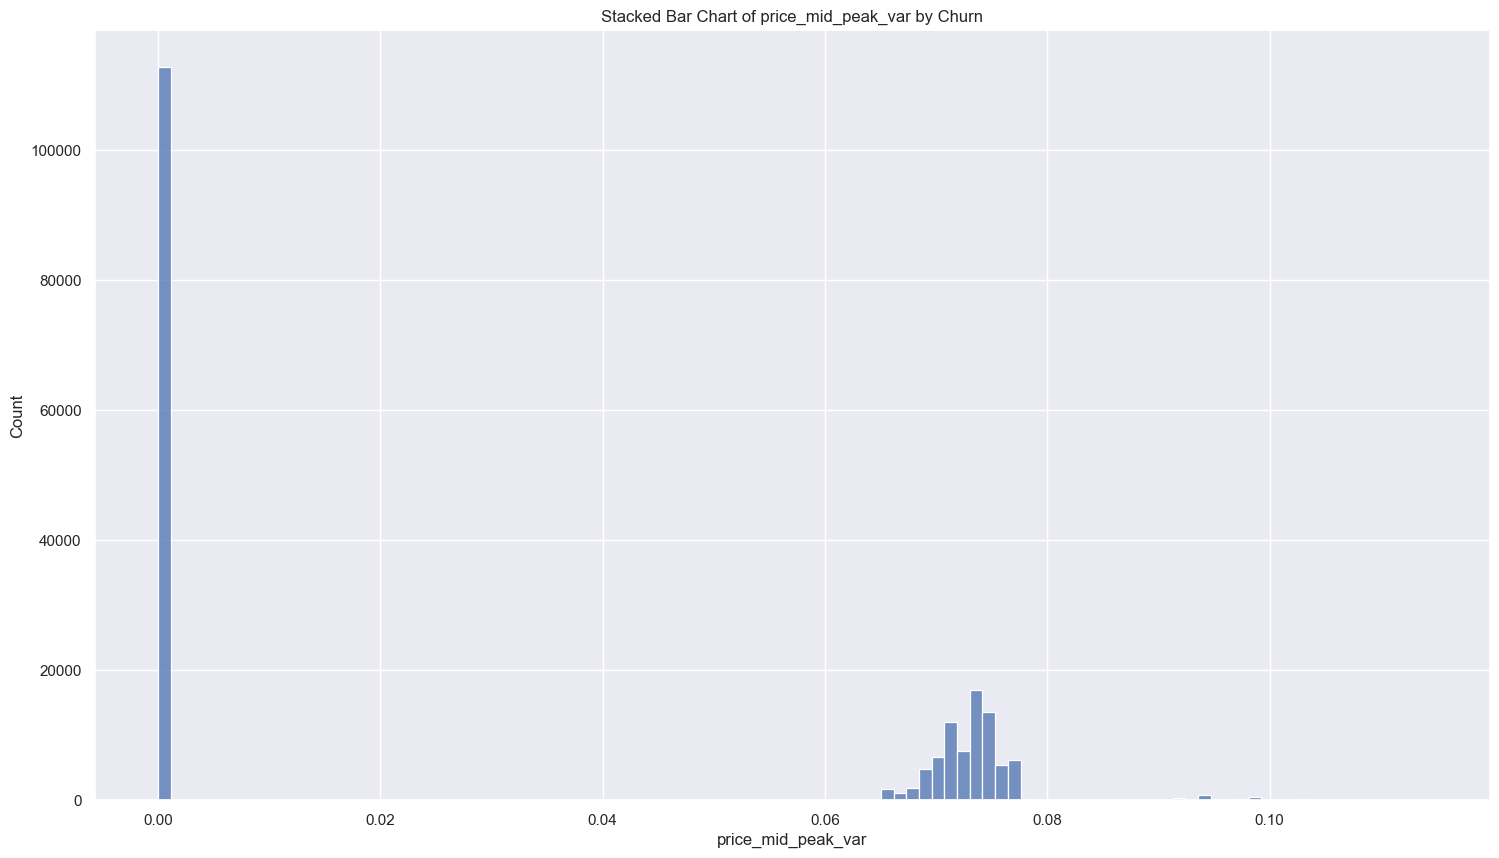

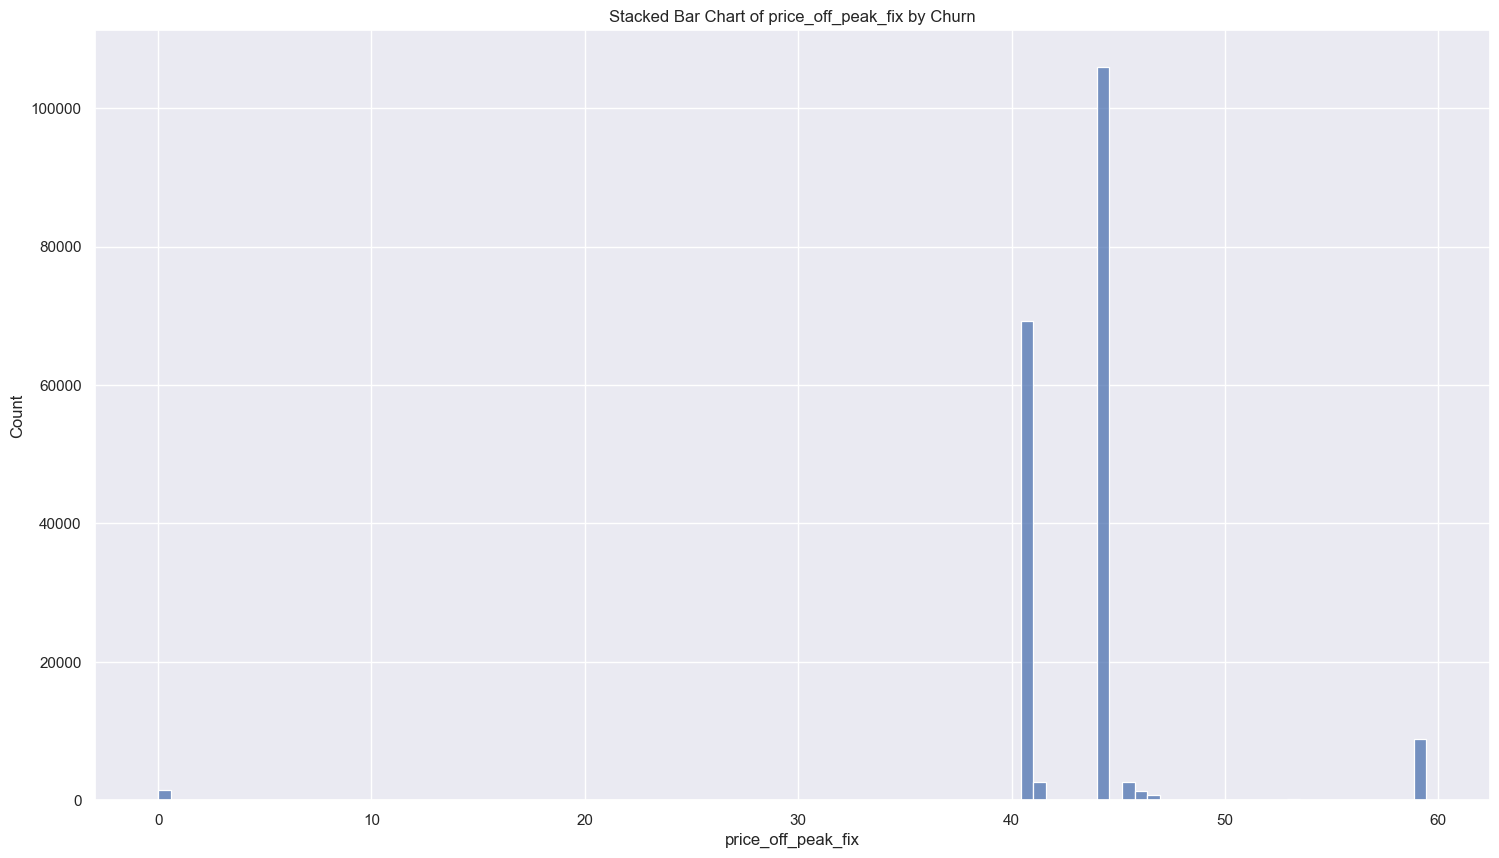

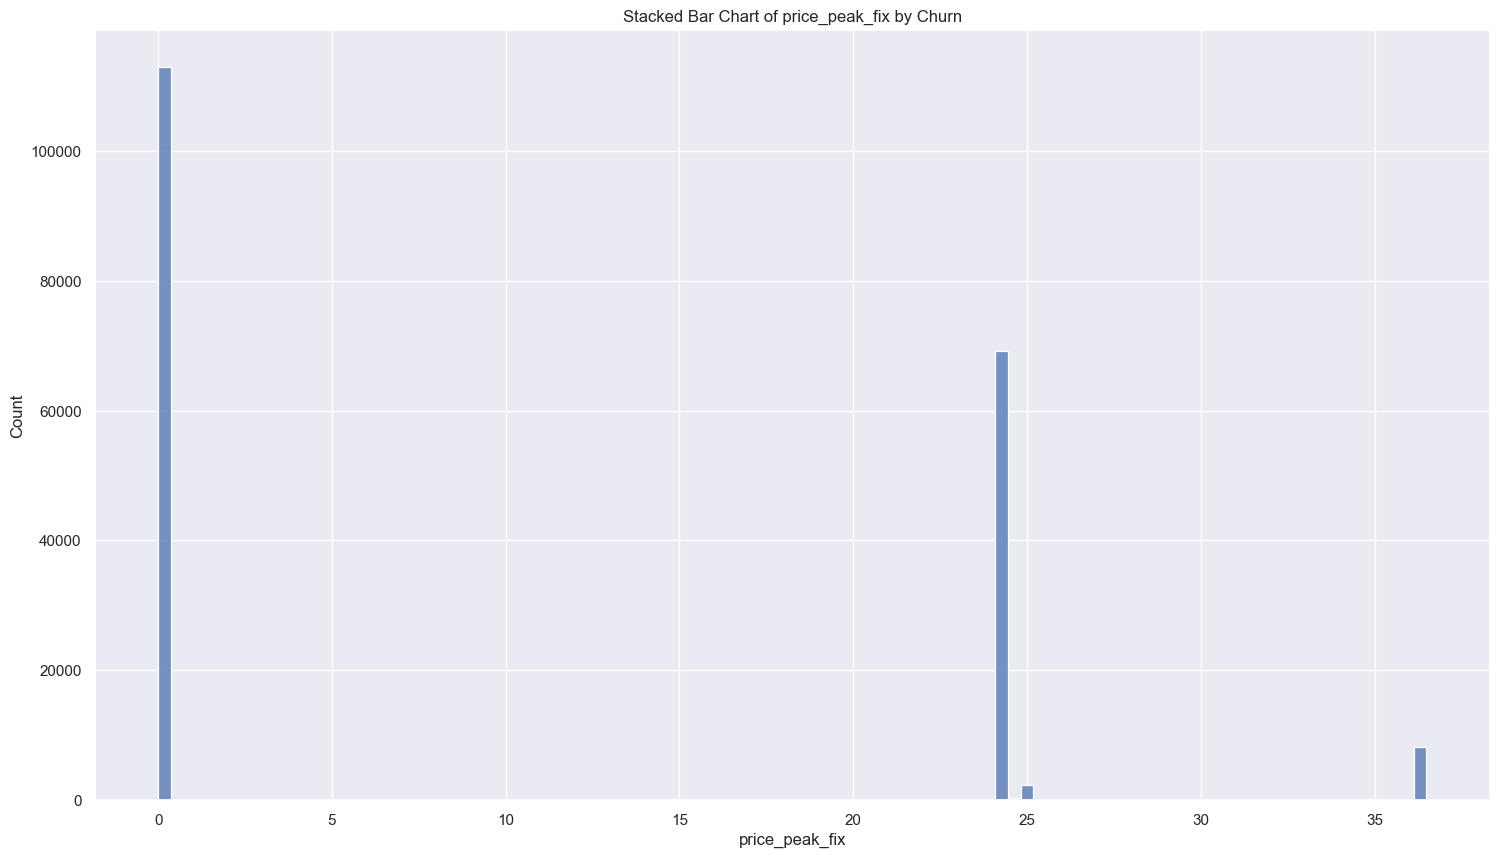

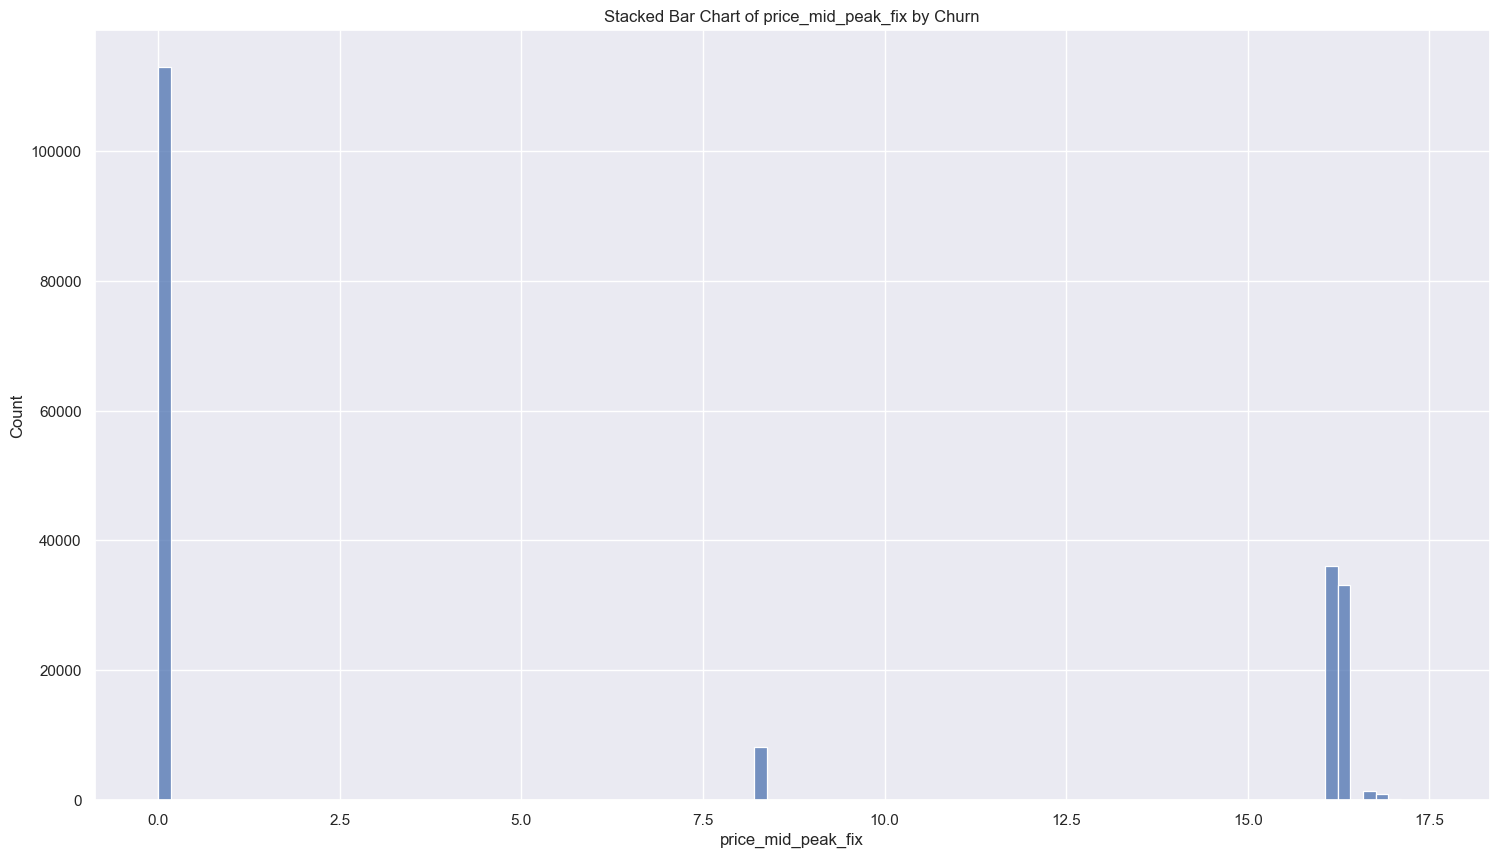

In [ ]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

* Based on the analysis of peak and off-peak prices, it was observed that there were numerous instances of 0 peak prices and mid-peak prices, but very few 0 off-peak prices. This suggests that the company's pricing strategy may be geared towards incentivizing consumption during off-peak periods. It is possible that the company may be offering discounts or special rates during off-peak periods to encourage customers to shift their energy consumption away from peak periods. Further analysis of customer behavior and consumption patterns during peak and off-peak periods may help to shed more light on this observation and inform future pricing strategies.

### Forecast

In [ ]:
forecast = client_df[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]
forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


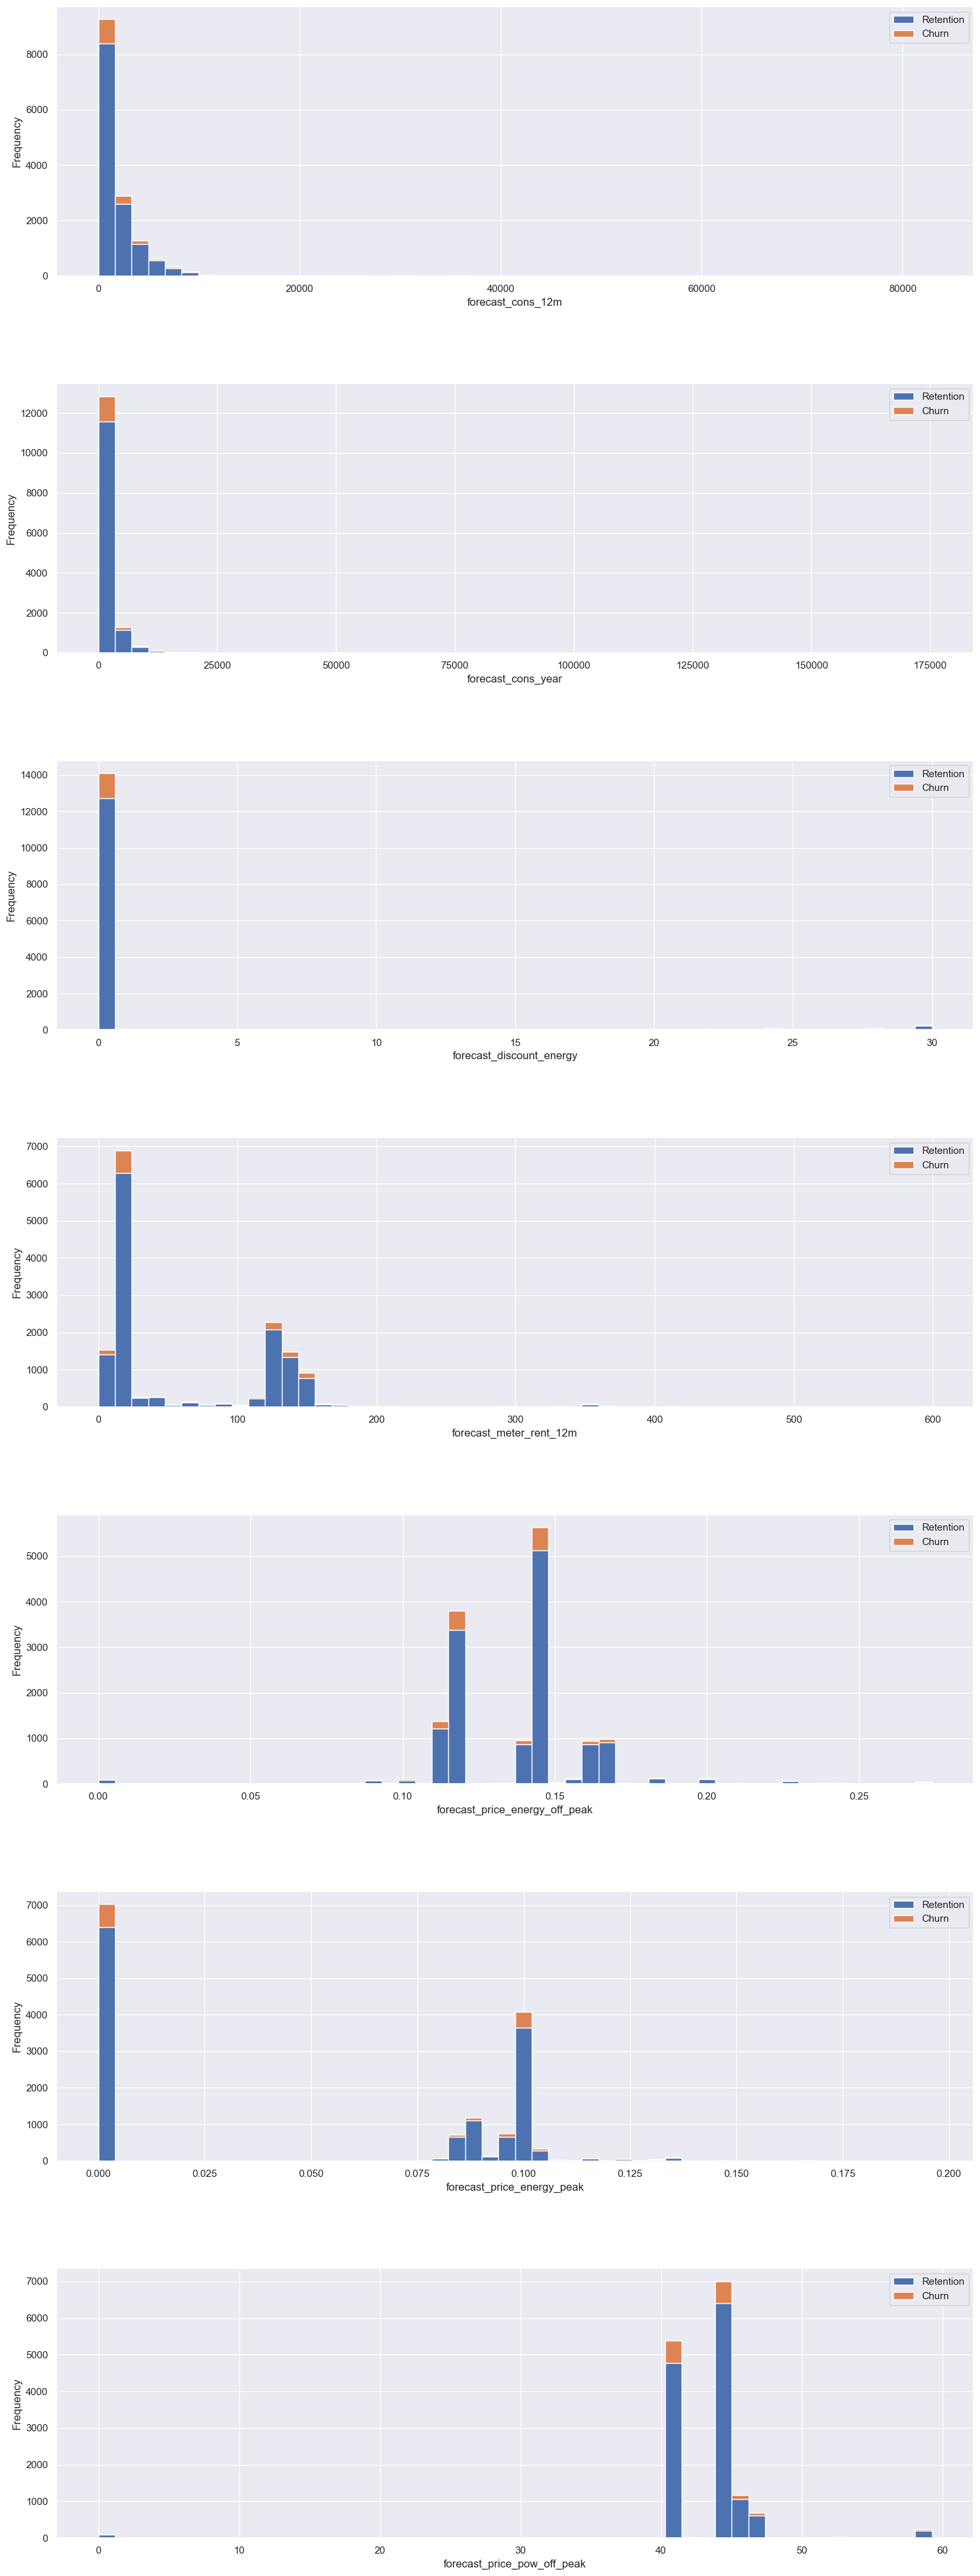

In [ ]:
# Plot histograms of price features

fig, axs = plt.subplots(nrows=7, figsize=(18,50))

fig.subplots_adjust(hspace=0.4)

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

* The analysis reveals that a number of variables exhibit a notable positive skewness which causes an elongated right tail, similar to the consumption patterns. To address this issue, we will apply certain modifications in the subsequent procedure.

* Moreover, most customers have a forecasted value of 0 for their current discount.

### Margins

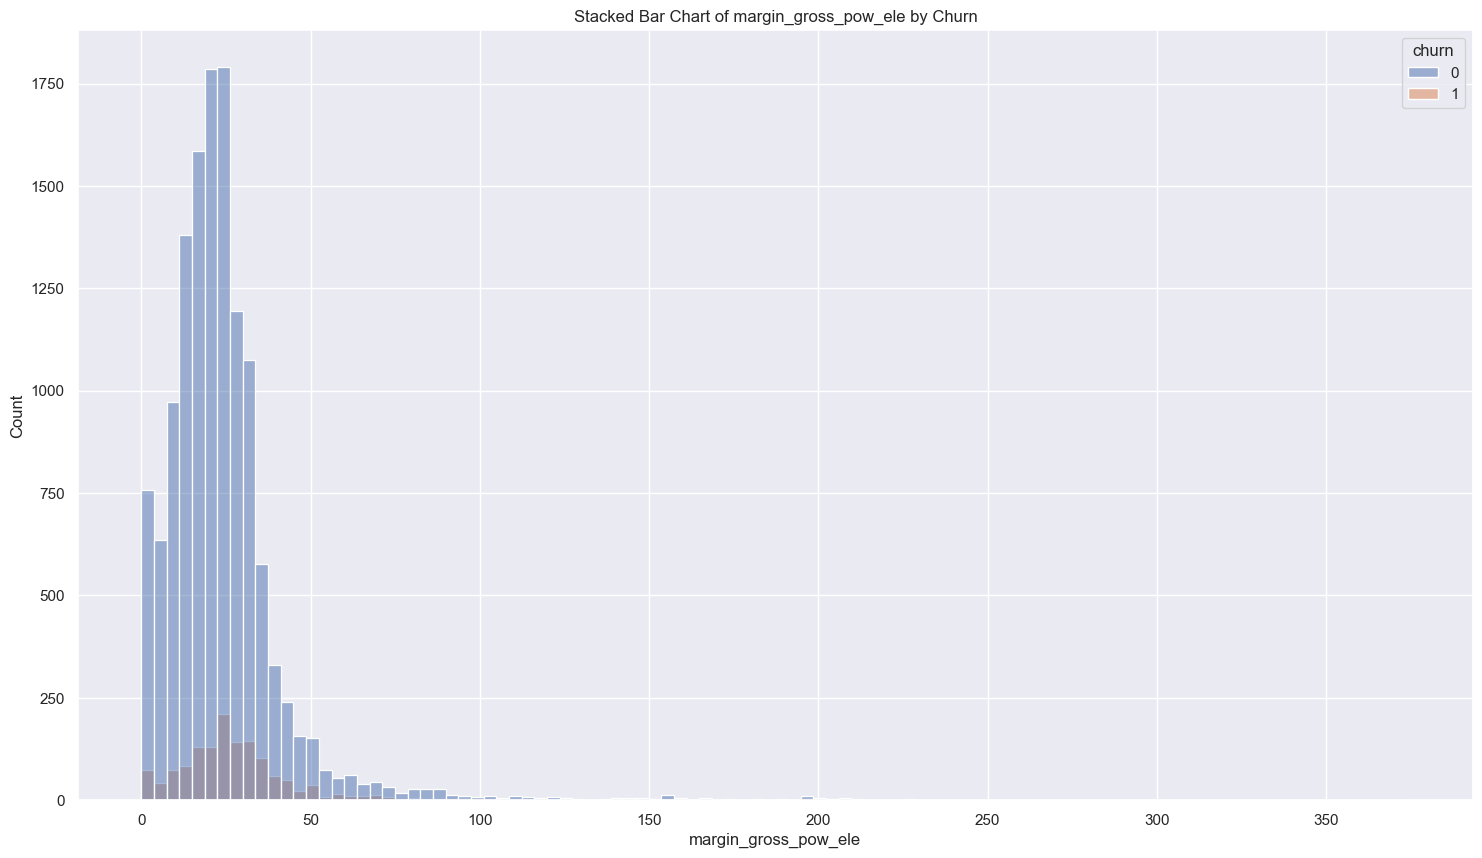

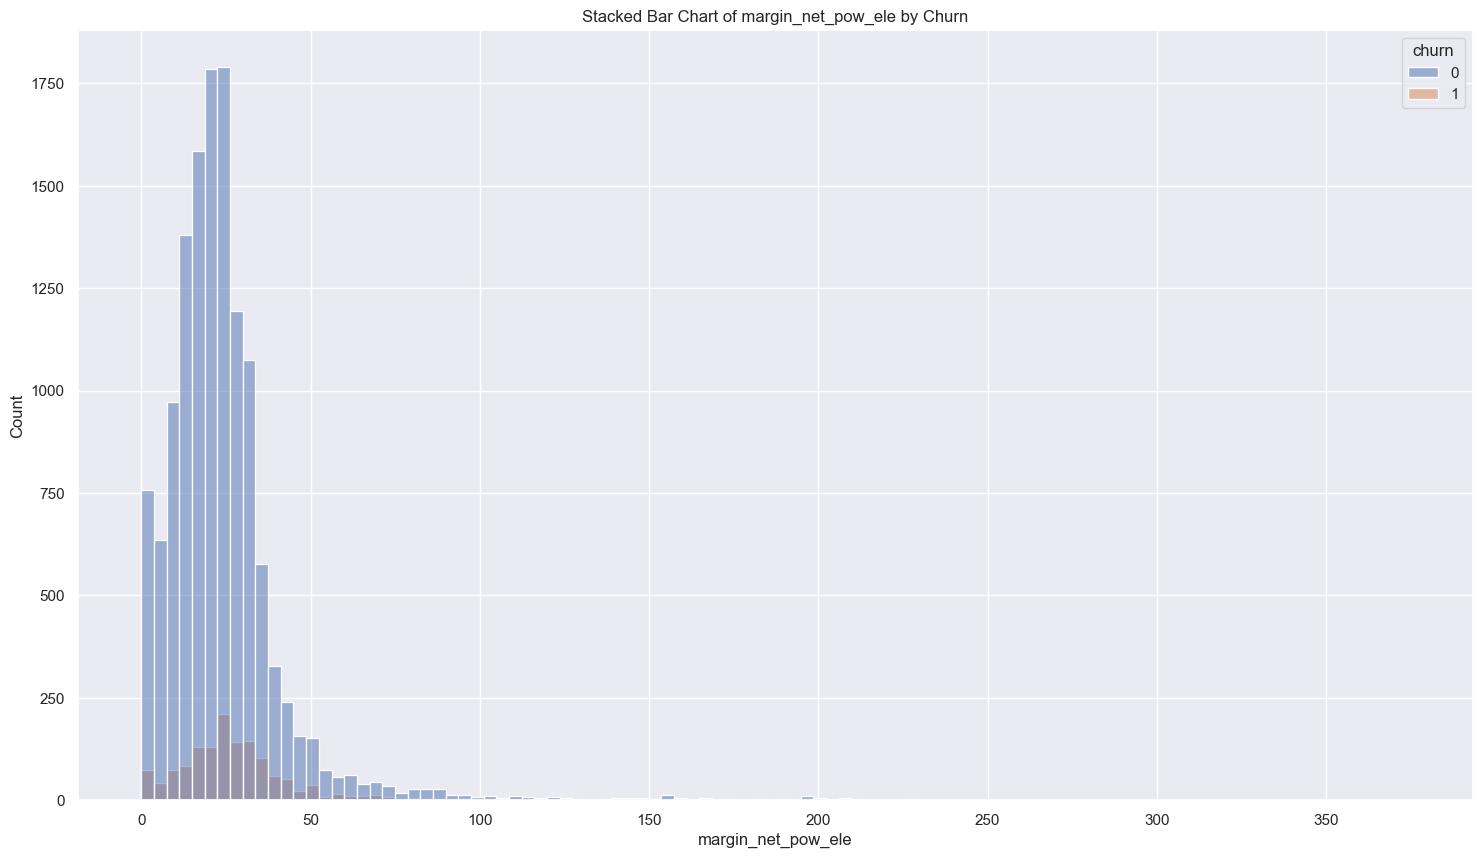

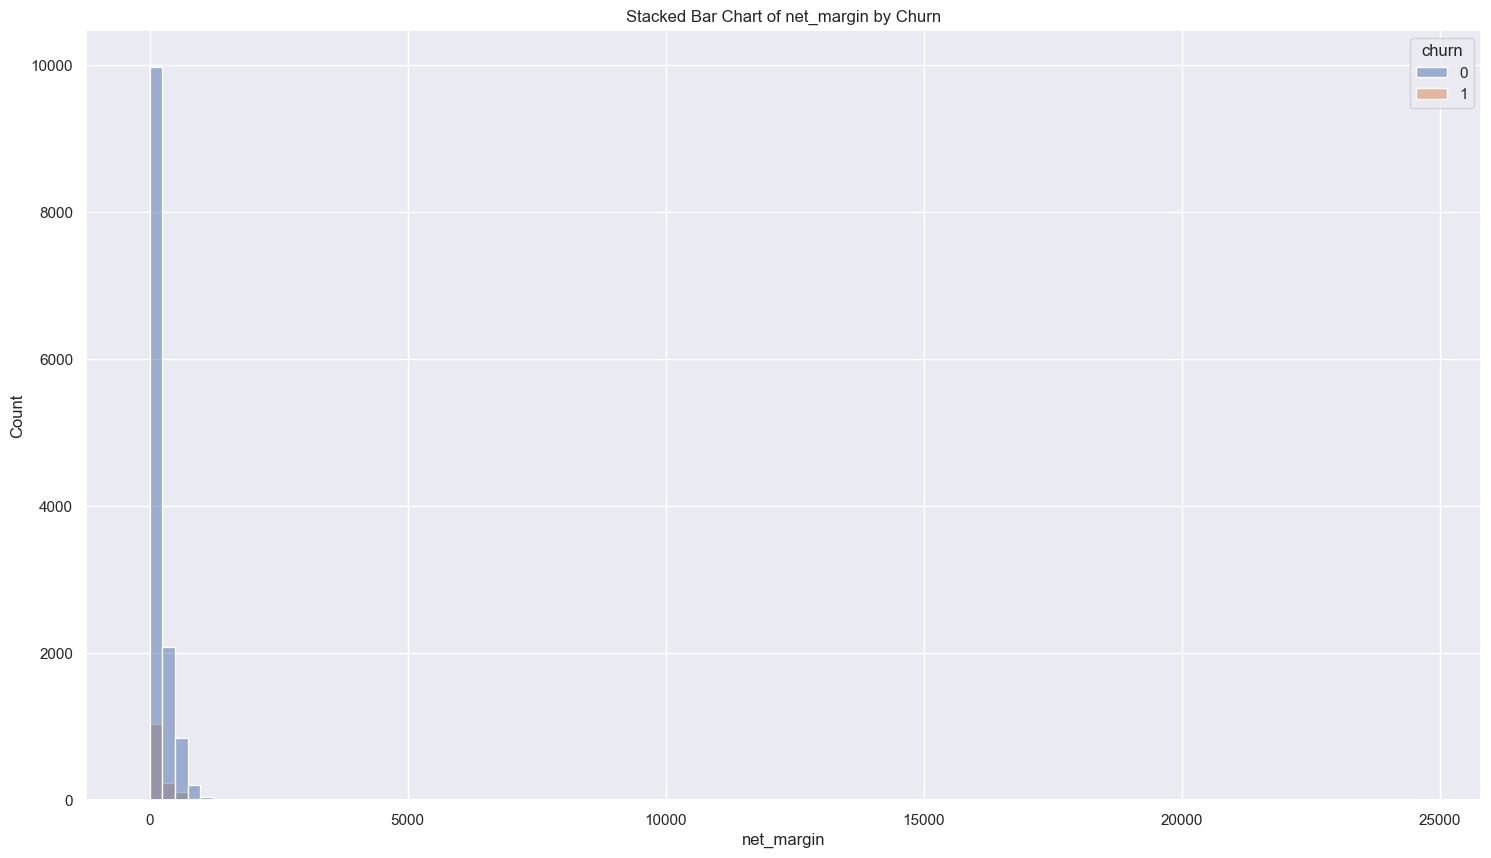

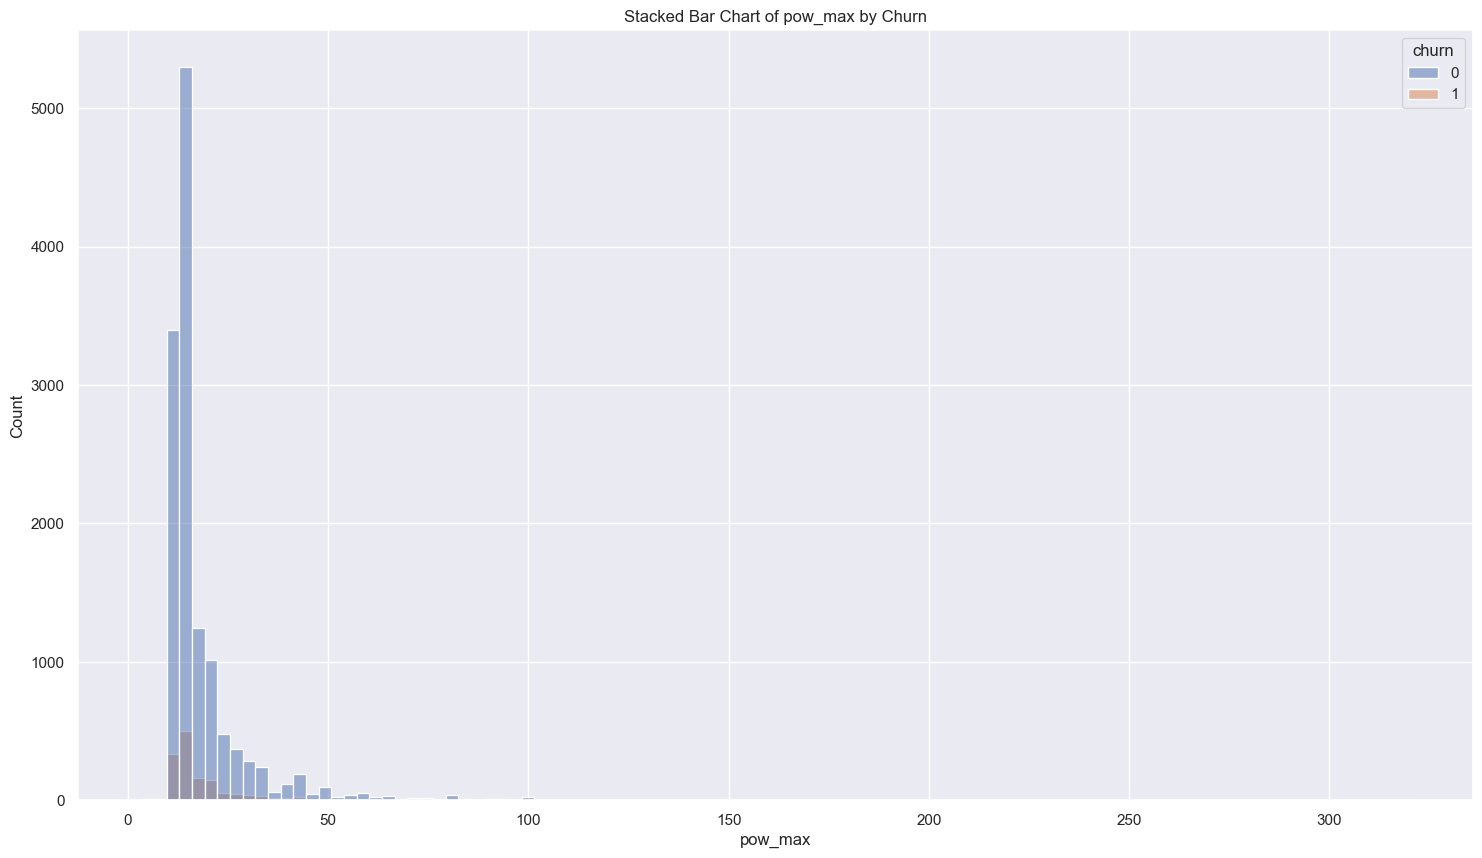

In [ ]:
for attr in ['margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

In [ ]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

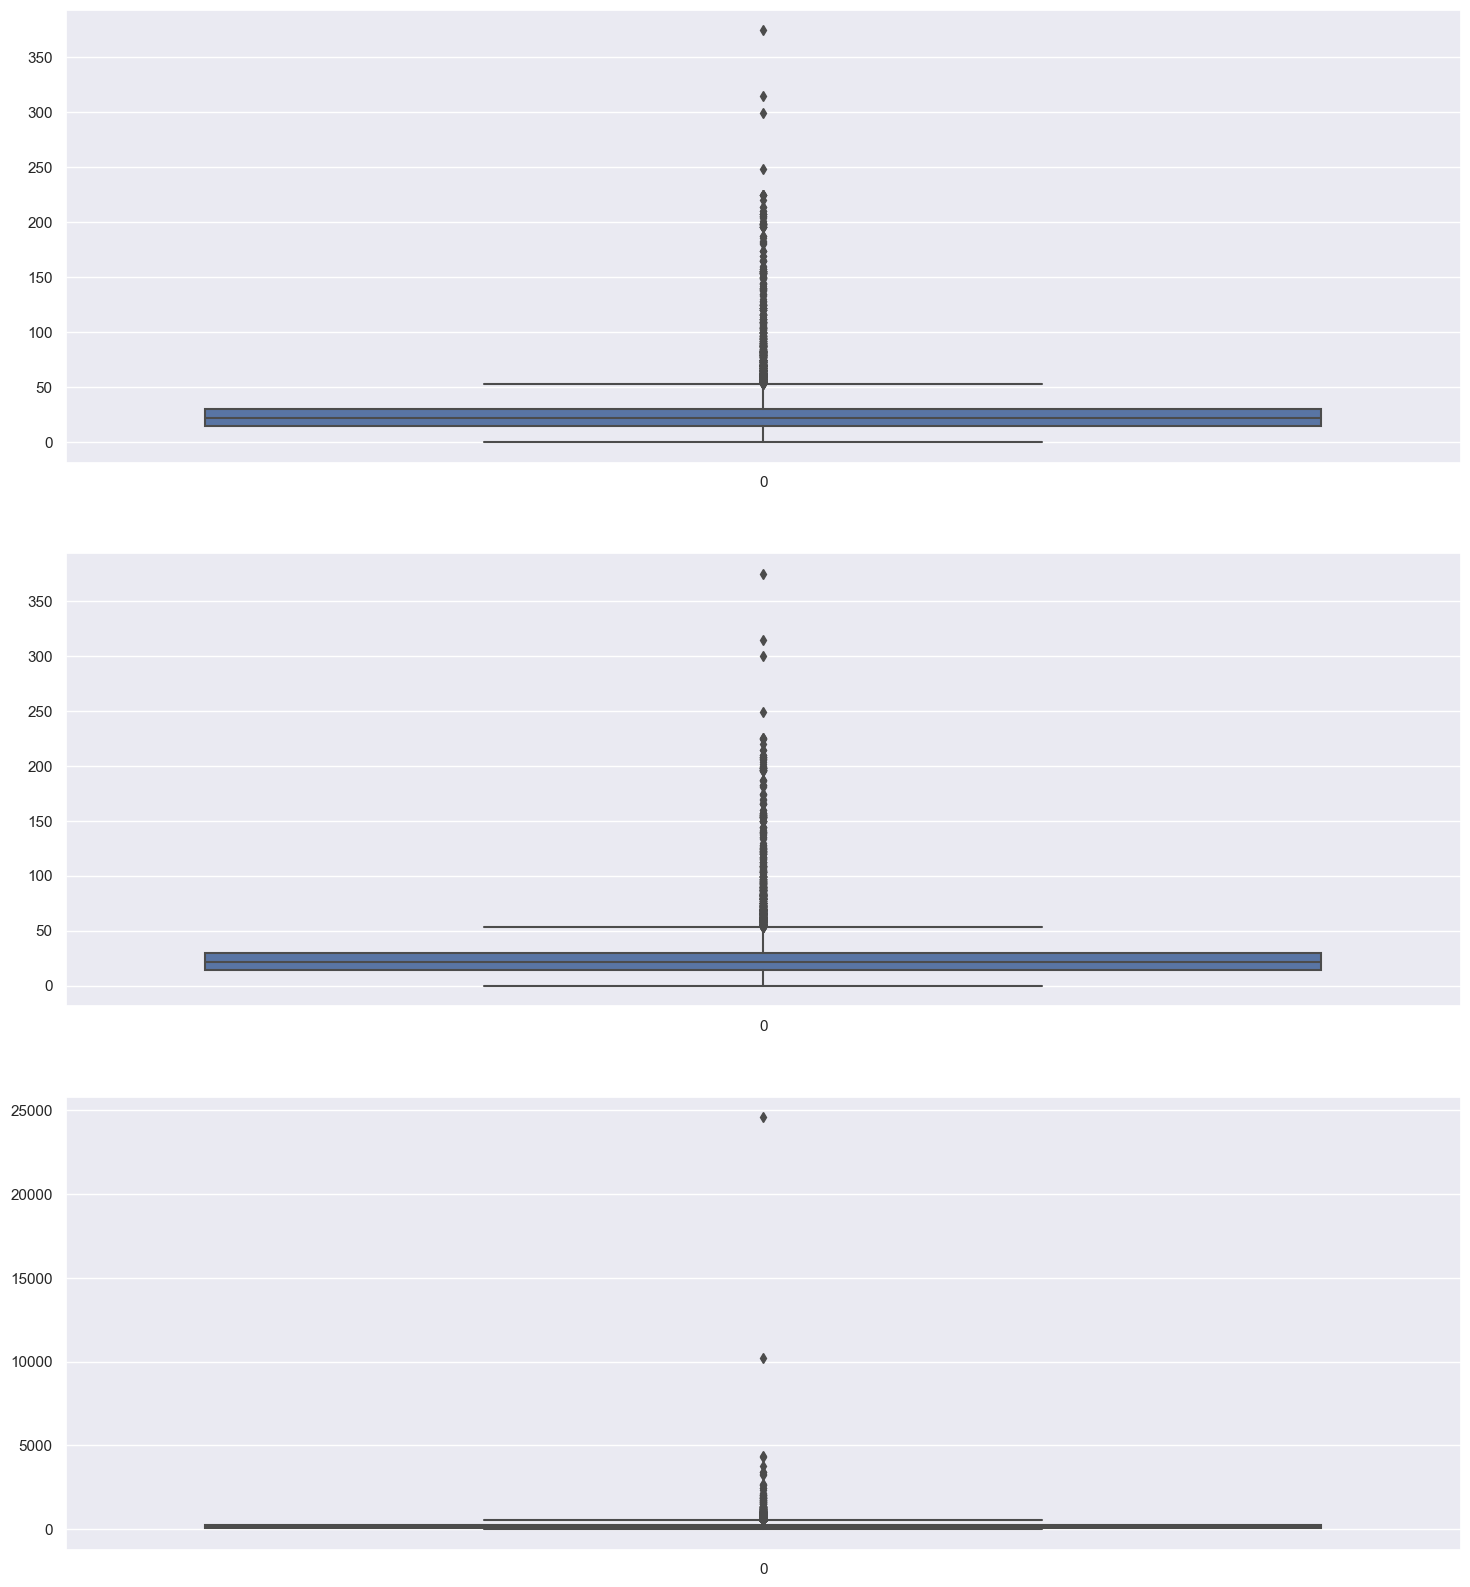

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

plt.show()

* The analysis of the graphs above reveals that several variables in the data exhibit a significantly skewed distribution, with a long tail for higher values. Additionally, some features exhibit outliers, which may affect the accuracy of any statistical analysis or machine learning model trained on this data. Therefore, it is recommended to perform certain adjustments, such as normalization or outlier removal, to ensure the data is suitable for further analysis.

# 5. Hypothesis Testing

To assess customer sensitivity to price, we can observe if the increase in prices leads to customer churn. If customers leave when prices go up, we can say they are sensitive to price. However, if customers switch even when there is no change or a decrease in prices, it is difficult to determine if they are sensitive to price. To measure price sensitivity, new features will be created using the consumption data for the year 2015. The features will calculate the average consumption for the entire year, the last six months, and the last three months.

In [ ]:
# Transform date columns to datetime type
date_columns = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
client_df[date_columns] = client_df[date_columns].apply(pd.to_datetime, format='%Y-%m-%d')

price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [ ]:
mean_year.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [ ]:
# rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)
     

mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [ ]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_6m["mean_year_price_off_peak"] = mean_6m["mean_year_price_off_peak_var"] + mean_6m["mean_year_price_off_peak_fix"]
mean_6m["mean_year_price_peak"] = mean_6m["mean_year_price_peak_var"] + mean_6m["mean_year_price_peak_fix"]
mean_6m["mean_year_price_med_peak"] = mean_6m["mean_year_price_mid_peak_var"] + mean_6m["mean_year_price_mid_peak_fix"]

In [ ]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_3m["mean_year_price_off_peak"] = mean_3m["mean_year_price_off_peak_var"] + mean_3m["mean_year_price_off_peak_fix"]
mean_3m["mean_year_price_peak"] = mean_3m["mean_year_price_peak_var"] + mean_3m["mean_year_price_peak_fix"]
mean_3m["mean_year_price_med_peak"] = mean_3m["mean_year_price_mid_peak_var"] + mean_3m["mean_year_price_mid_peak_fix"]

In [ ]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [ ]:
price_features.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,...,price_date,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,...,2015-11-16,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [ ]:
#  Merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn
price_churn_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn_analysis.head() 

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


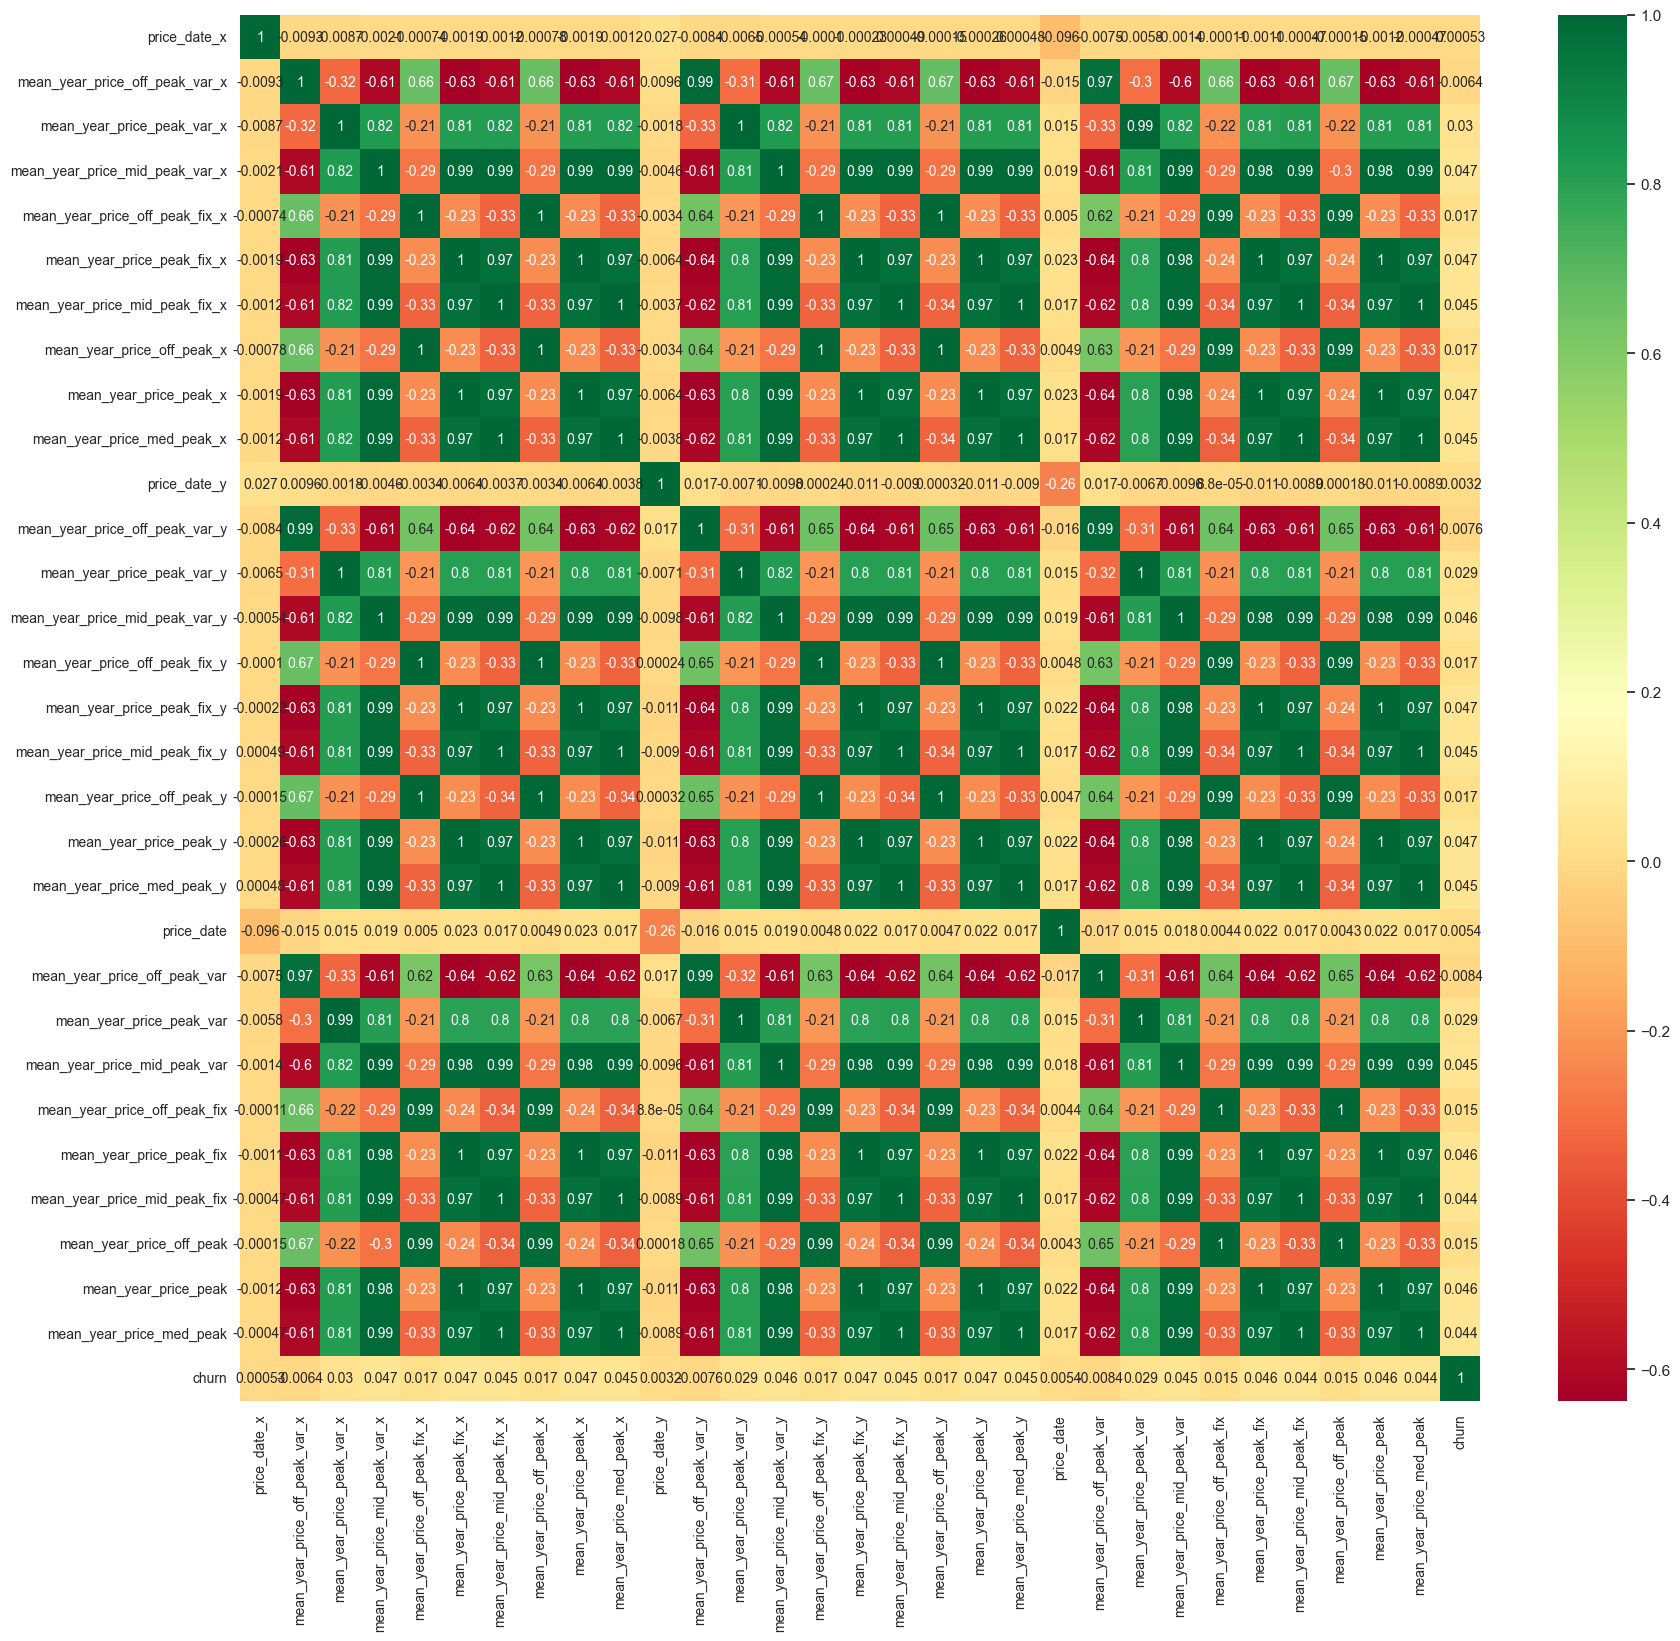

In [ ]:
price_churn_analysis.set_index('id', inplace=True)

corr = price_churn_analysis.corr()

# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


* While the correlation between price sensitivity and churn is generally not very strong, the correlation plot indicates a stronger relationship between price sensitivity and other variables related to pricing. This implies that the relationship between price sensitivity and churn may not be straightforward or linear. Therefore, if we want price sensitivity to play a significant role in predicting churn, we may need to consider alternative ways of incorporating this feature into our analysis.

### Alternatives

* Considering that cstomer churn remained unaffected by changes in prices over the last 6 months.

In [ ]:
stat_ = ['max', 'min', 'mean']

price_6_month = price_df[price_df['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_6_month.columns = ['_'.join(x) for x in zip(price_6_month.columns.get_level_values(0), price_6_month.columns.get_level_values(1))]
price_6_month = price_6_month.reset_index()
# add churn values
price_6_month = price_6_month.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_6_month = price_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_6_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_6_month[f'{attr}_mean']
price_6_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,0.024593,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.025932,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.058081,-1.500000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.028590,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,0.024593,3.715825


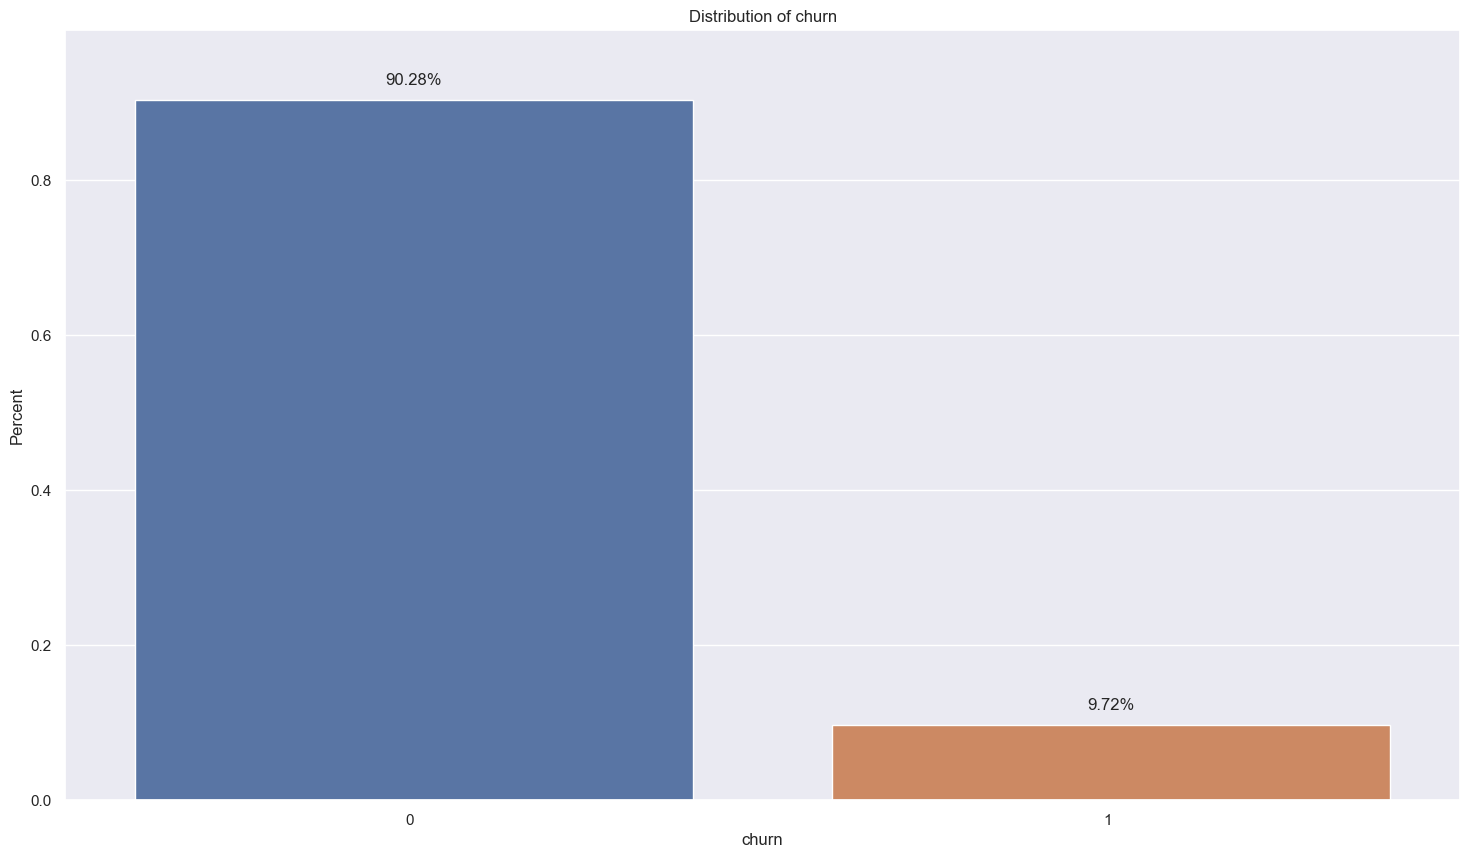

In [ ]:
plot_label_bar_chart(df=price_6_month[price_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

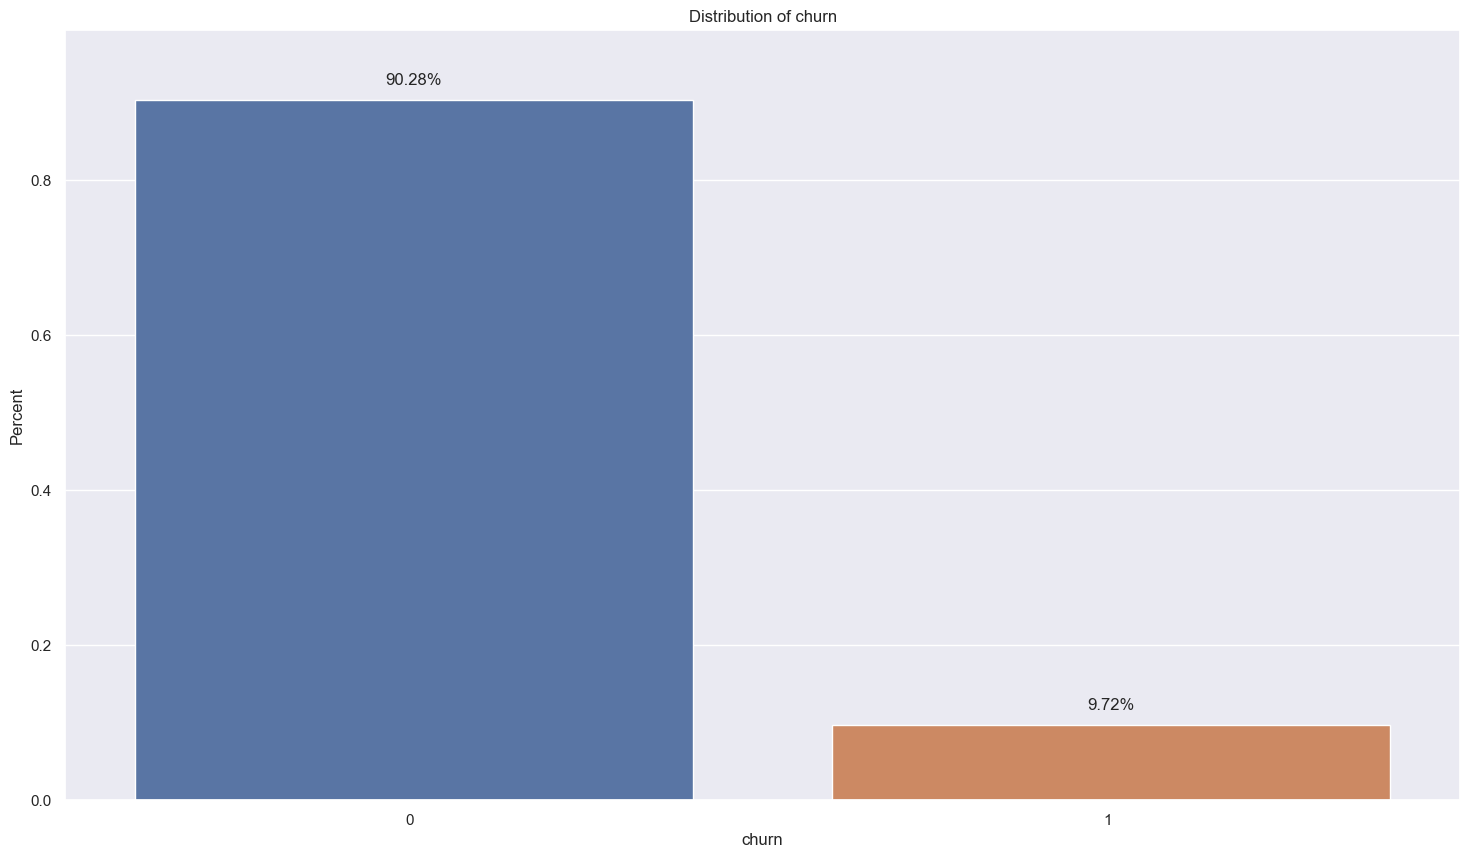

In [ ]:
plot_label_bar_chart(df=price_6_month[price_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

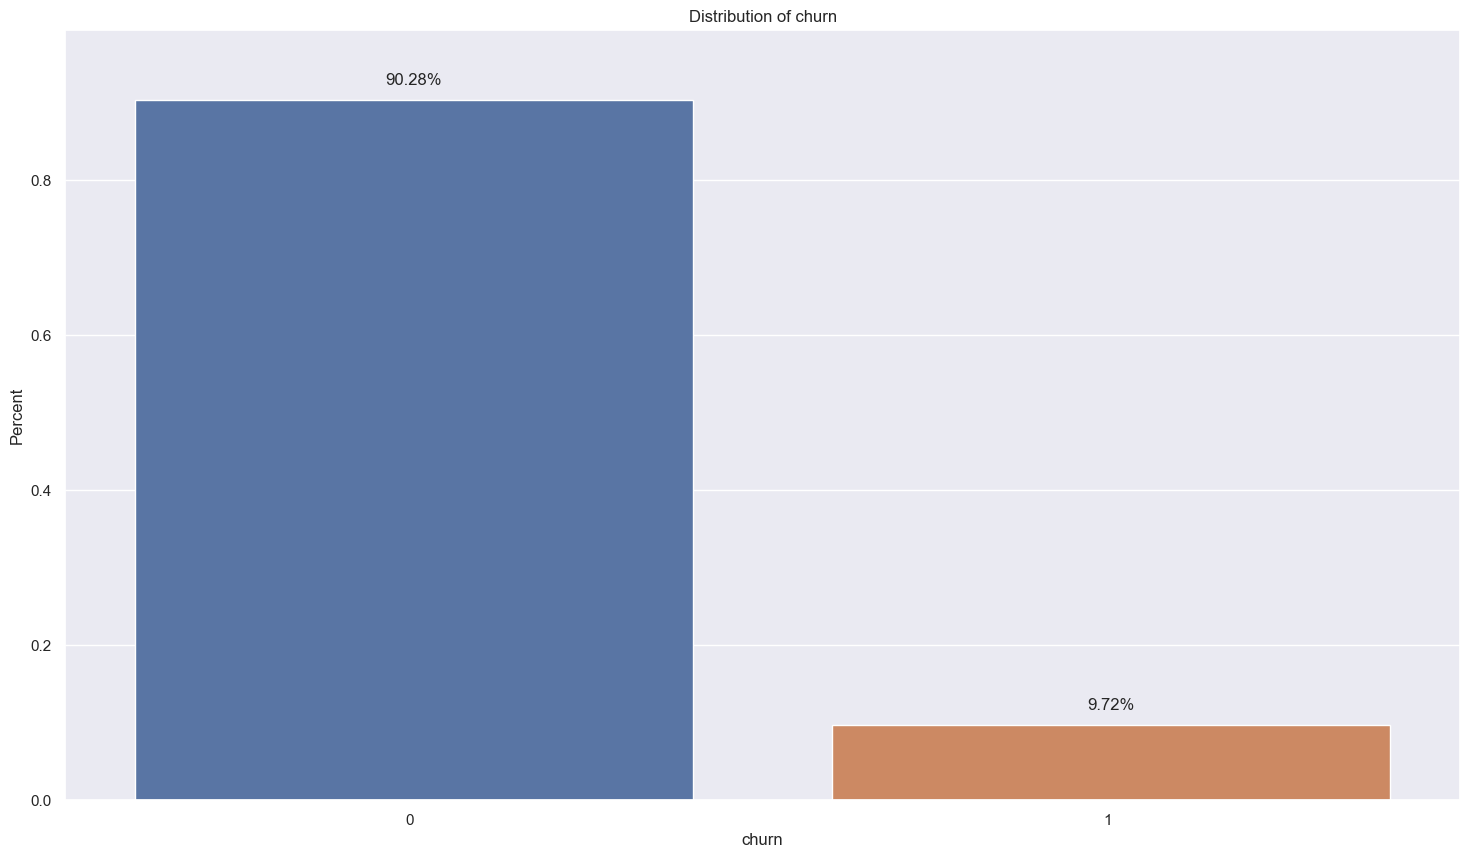

In [ ]:
plot_label_bar_chart(df=price_6_month[price_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

In [ ]:
price_3_month = price_df[price_df['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_3_month.columns = ['_'.join(x) for x in zip(price_3_month.columns.get_level_values(0), price_3_month.columns.get_level_values(1))]
price_3_month = price_3_month.reset_index()
# add churn values
price_3_month = price_3_month.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_3_month = price_3_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_3_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_3_month[f'{attr}_mean']
price_3_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.025953,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,-0.025188,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,-0.057337,-1.500000
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,-0.027846,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.025953,3.715825


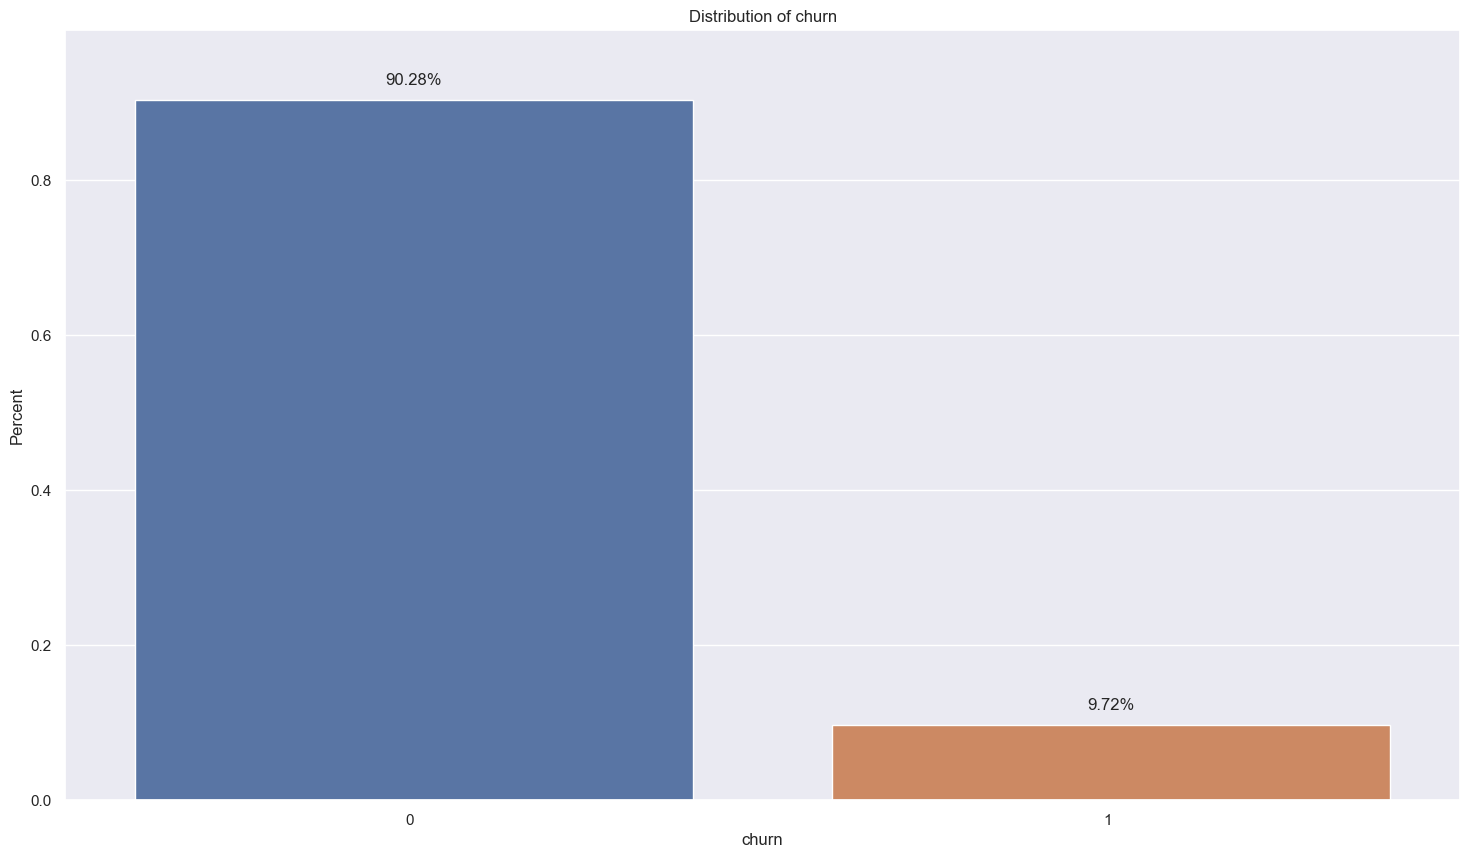

In [ ]:
plot_label_bar_chart(df=price_3_month[price_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

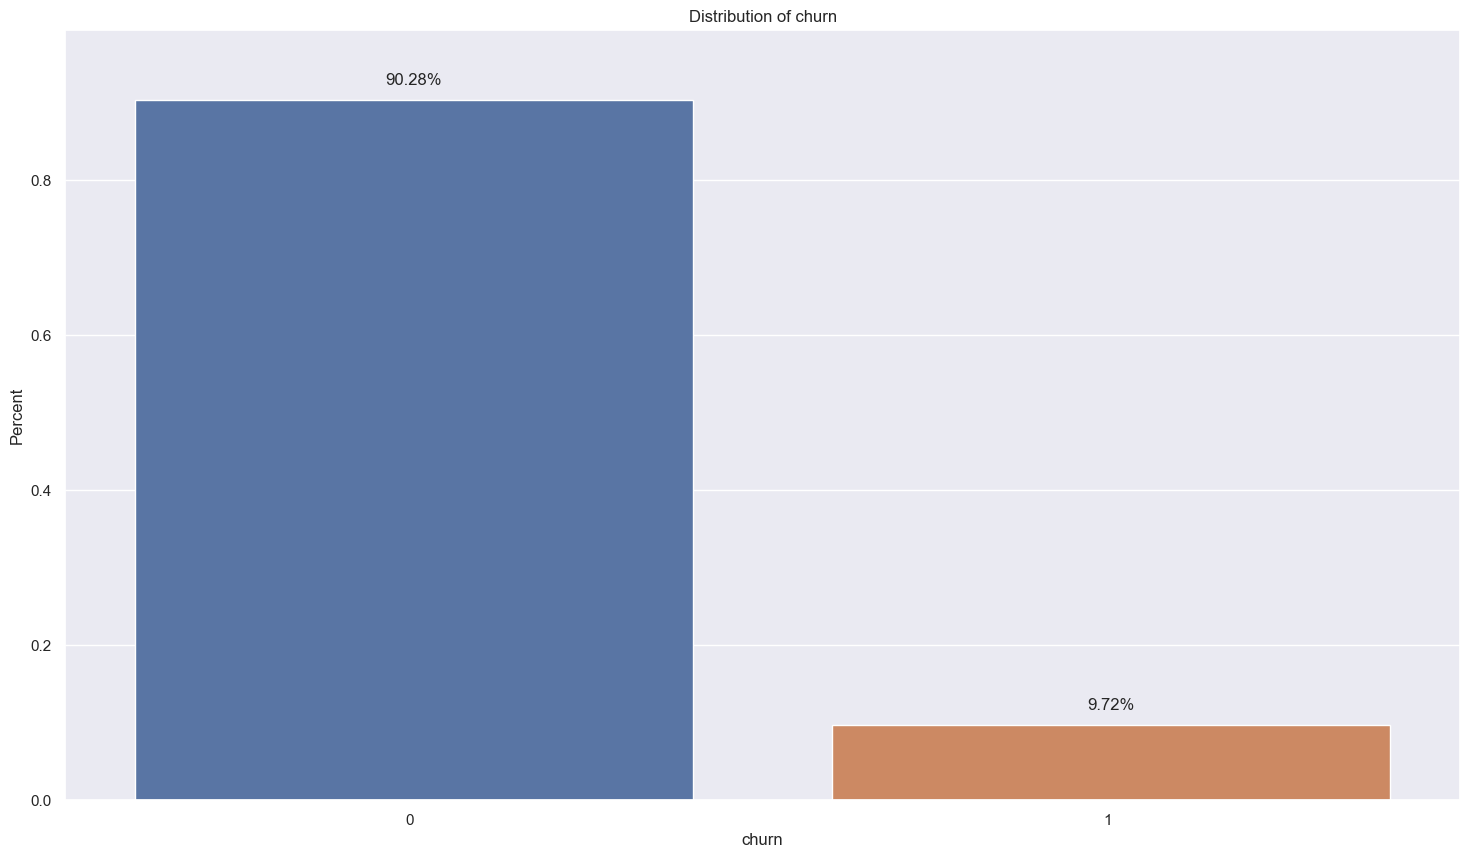

In [ ]:
plot_label_bar_chart(df=price_3_month[price_3_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

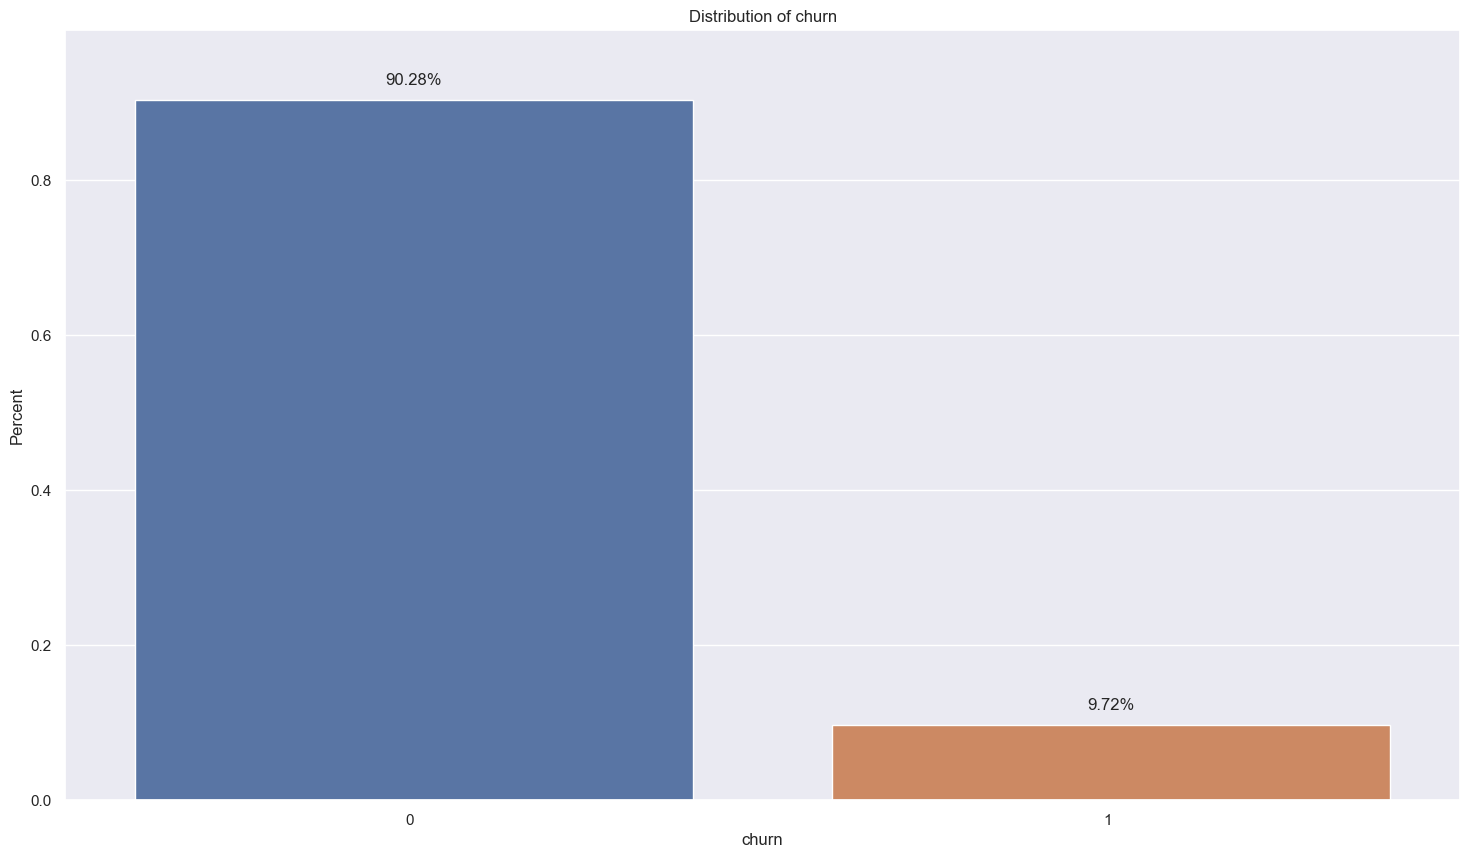

In [ ]:
plot_label_bar_chart(df=price_3_month[price_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

* About 9.72% of customers changed providers for 3 and 6 months

In [ ]:
merged_data.to_csv('clean_data_eda.csv')